In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge

sns.set_style("darkgrid")

In [133]:
train_df = pd.read_csv("dataset/train.csv", parse_dates=["date"])
original_train_df = train_df.copy()
test_df = pd.read_csv("dataset/test.csv", parse_dates=["date"])

In [134]:
display(train_df.head(3))
display(test_df.head(3))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id       date country              store            product  num_sold
0   0 2010-01-01  Canada  Discount Stickers  Holographic Goose       NaN
1   1 2010-01-01  Canada  Discount Stickers             Kaggle     973.0
2   2 2010-01-01  Canada  Discount Stickers       Kaggle Tiers     906.0

id       date country              store            product
0  230130 2017-01-01  Canada  Discount Stickers  Holographic Goose
1  230131 2017-01-01  Canada  Discount Stickers             Kaggle
2  230132 2017-01-01  Canada  Discount Stickers       Kaggle Tiers

In [135]:
def get_val_counts(df, column_name, sort_by_column_name=False):
  value_count = df[column_name].value_counts().reset_index().rename(columns={"count":"Value Count"}).set_index(column_name)
  value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
  value_count = value_count.reset_index()
  if sort_by_column_name:
    value_count = value_count.sort_values(column_name)
  return value_count

def plot_value_counts_pie(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  val_count_df.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");

def plot_value_counts_bar(df, column_name, sort_by_column_name=False):
  val_count_df = get_val_counts(df, column_name, sort_by_column_name)
  f, ax = plt.subplots(figsize=(12, 6))
  sns.barplot(data=val_count_df, y="Value Count", x=column_name)
  
  for index, row in val_count_df.iterrows():
    count = row["Value Count"]
    percentage = row["Percentage"]
    ax.text(
      x=index,
      y=row["Value Count"] + max(val_count_df["Value Count"])*0.02,
      s=f"{count}({percentage:.2f}%)",
      ha="center",
      va="bottom"
    )
  
  

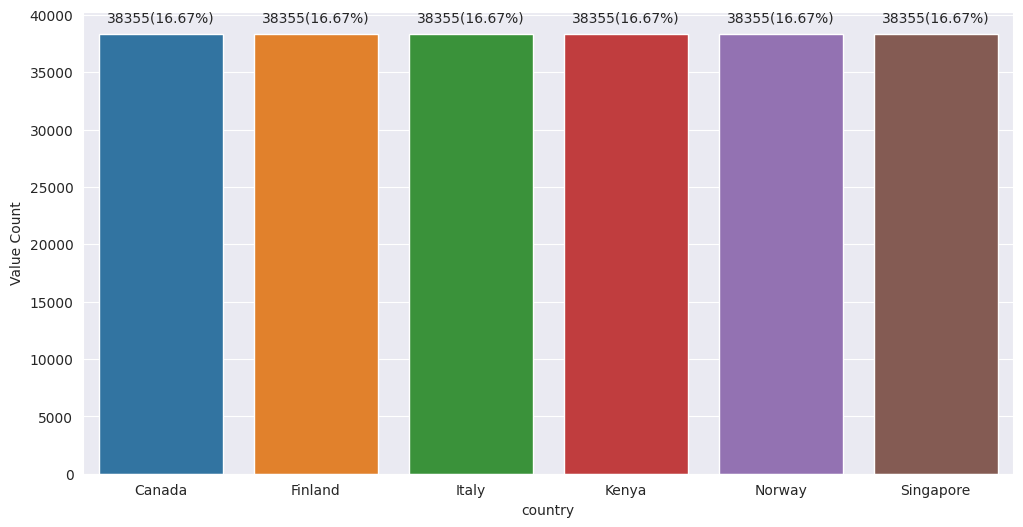

In [136]:
plot_value_counts_bar(train_df, "country")

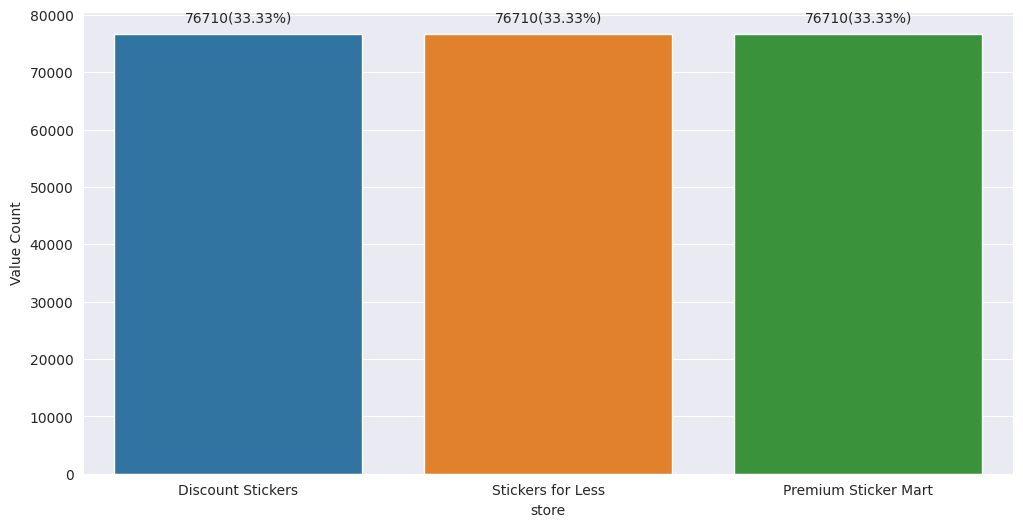

In [137]:
plot_value_counts_bar(train_df, "store")

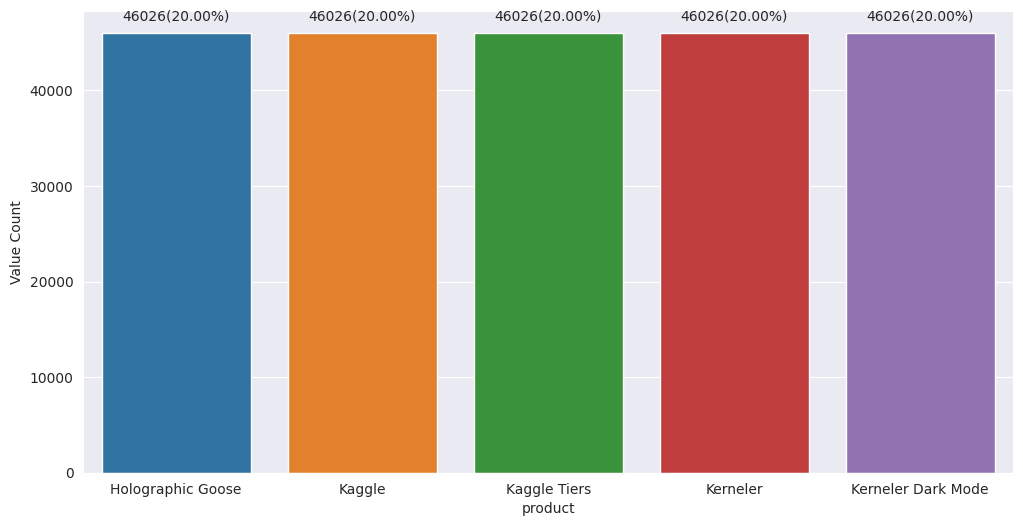

In [138]:
plot_value_counts_bar(train_df, "product")

In [139]:
counts = train_df.groupby(["country", "store", "product"])["id"].count().rename("num_rows").reset_index()
counts_val_counts = counts["num_rows"].value_counts().rename("Count").reset_index().rename(columns={"index":"length"})
display(counts_val_counts.head(10))

num_rows  Count
0      2557     90

In [140]:
print(f"Number of missing num_sold rows: {train_df['num_sold'].isna().sum()}")

Number of missing num_sold rows: 8871


In [141]:
counts = train_df.groupby(["country", "store", "product"])["num_sold"].count().rename("num_rows")
missing_data = counts.loc[counts != 2557]
missing_data_df = missing_data.reset_index()
missing_data_df["num_missing_rows"] = 2557 - missing_data_df["num_rows"]
missing_data_df

country                 store             product  num_rows  \
0  Canada     Discount Stickers   Holographic Goose         0   
1  Canada     Discount Stickers            Kerneler      2556   
2  Canada  Premium Sticker Mart   Holographic Goose      2177   
3  Canada     Stickers for Less   Holographic Goose      1249   
4   Kenya     Discount Stickers   Holographic Goose         0   
5   Kenya     Discount Stickers            Kerneler      2494   
6   Kenya     Discount Stickers  Kerneler Dark Mode      2556   
7   Kenya  Premium Sticker Mart   Holographic Goose      1911   
8   Kenya     Stickers for Less   Holographic Goose      1199   

   num_missing_rows  
0              2557  
1                 1  
2               380  
3              1308  
4              2557  
5                63  
6                 1  
7               646  
8              1358

undefined


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

undefined


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

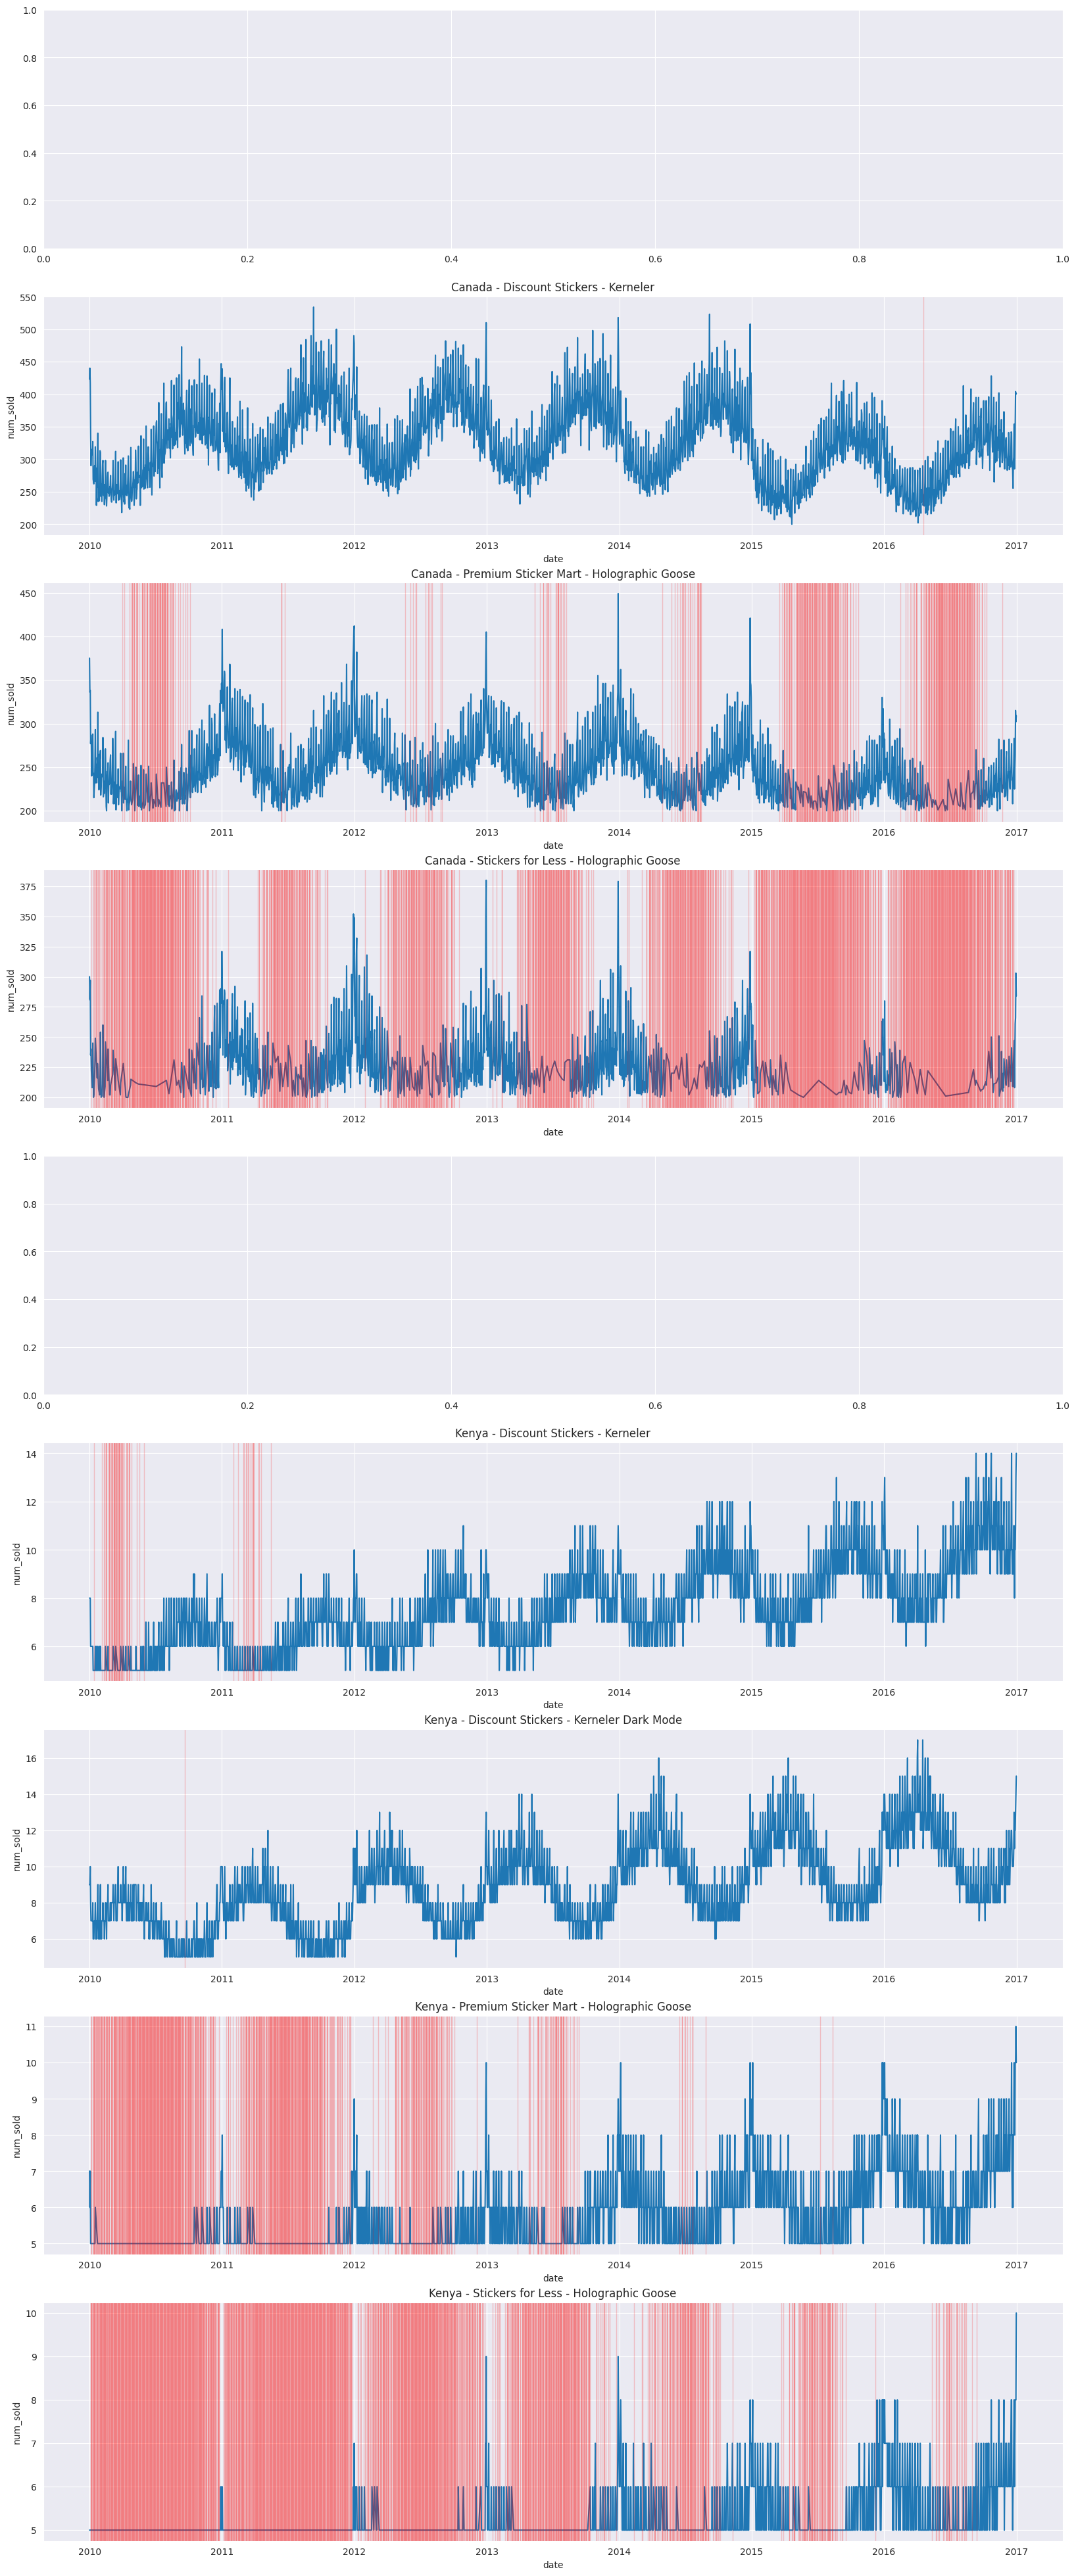

In [142]:
f,axs = plt.subplots(9,1, figsize=(20,50))
for i, (country, store, product) in enumerate(missing_data.index):
    plot_df = train_df.loc[(train_df["country"] == country) & (train_df["store"] == store) & (train_df["product"] == product)]
    missing_vals = plot_df.loc[plot_df["num_sold"].isna()]
    if plot_df["num_sold"].isna().all():
        print("undefined")
        continue
    sns.lineplot(data=plot_df, x="date", y="num_sold", ax=axs[i])
    for missing_date in missing_vals["date"]:
        axs[i].axvline(missing_date, color='red',  linestyle='-', linewidth=1, alpha=0.2)
    axs[i].set_title(f"{country} - {store} - {product}")

In [143]:
print("Train - Earliest date:", train_df["date"].min())
print("Train - Latest date:", train_df["date"].max())

print("Test - Earliest date:", test_df["date"].min())
print("Test - Latest date:", test_df["date"].max())

Train - Earliest date: 2010-01-01 00:00:00
Train - Latest date: 2016-12-31 00:00:00
Test - Earliest date: 2017-01-01 00:00:00
Test - Latest date: 2019-12-31 00:00:00


In [144]:
weekly_df = train_df.groupby(["country", "store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby(["country", "store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [145]:
def plot_all(df):
  f, axes = plt.subplots(3, 2, figsize=(25, 25), sharex=True, sharey=True)
  f.tight_layout()
  for n, prod in enumerate(df["product"].unique()):
    plot_df = df.loc[df["product"] == prod]
    sns.lineplot(data=plot_df, x="date", y="num_sold", hue="country", style="store", ax = axes[n//2, n%2])
    axes[n//2, n%2].set_title("Product:" + str(prod))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

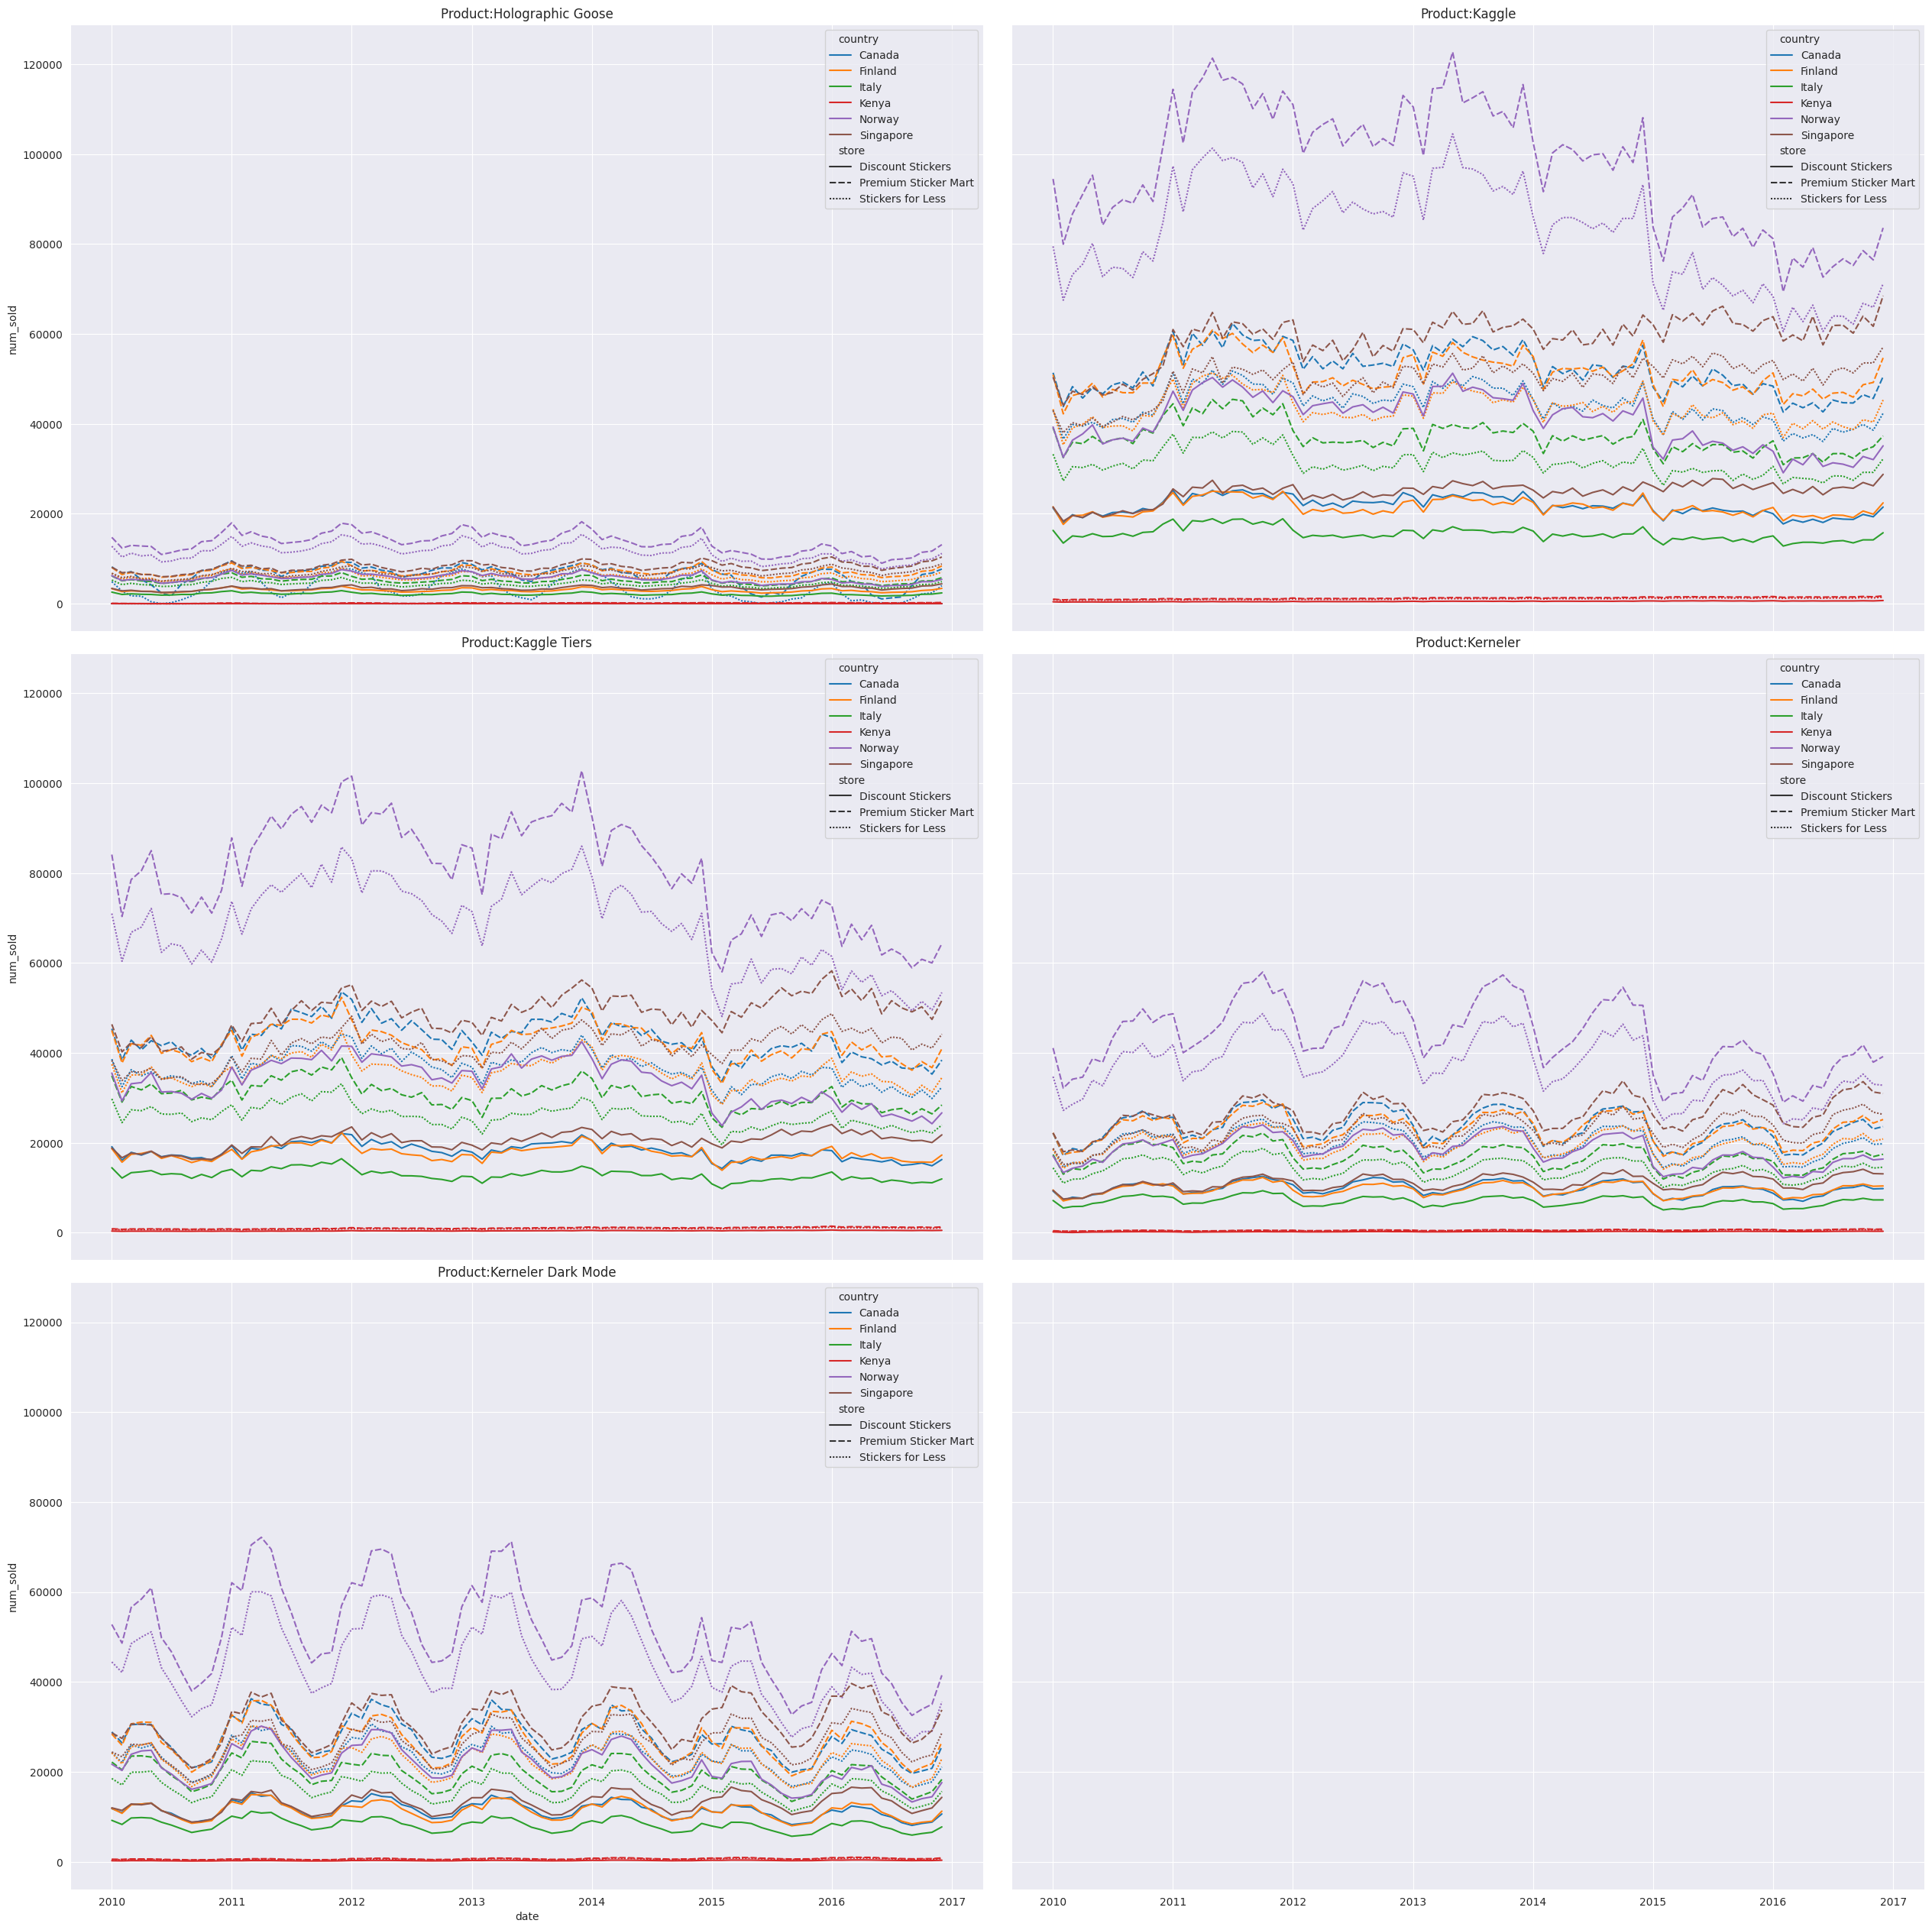

In [146]:
plot_all(monthly_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0, 0.5, 'Proportion of sales')

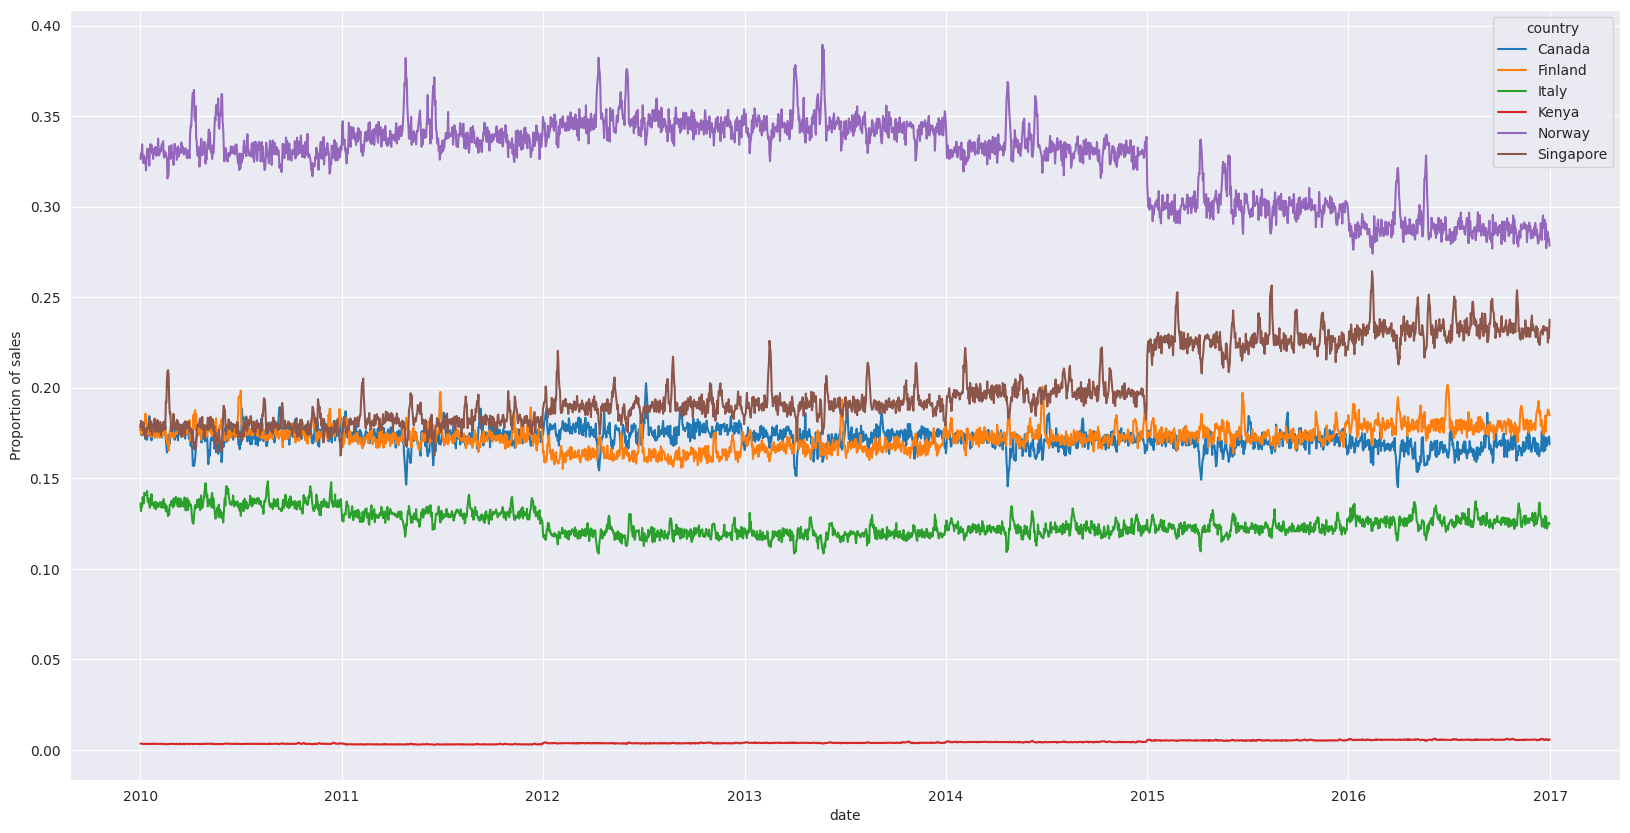

In [147]:
country_weights = train_df.groupby("country")["num_sold"].sum()/train_df["num_sold"].sum()

country_ratio_over_time = (train_df.groupby(["date", "country"])["num_sold"].sum() / train_df.groupby(["date"])["num_sold"].sum()).reset_index()
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=country_ratio_over_time, x="date", y="num_sold", hue="country")
ax.set_ylabel("Proportion of sales")

In [148]:
def decompose(train, c, ax):
    df = train.groupby(['date',c])[['num_sold']].sum().reset_index().join(
                            train.groupby('date')[['num_sold']].sum(), on='date',rsuffix='_global')
    df['fractions'] = df['num_sold']/df['num_sold_global']
    for m in np.sort(df[c].unique()):
        mask = df[c]==m
        ax.plot(df[mask]['date'],df[mask]['fractions'],label=m)
    ax.legend(bbox_to_anchor=(1, 1))  


In [150]:
import requests

def get_gdp_per_capital(alpha3, year):
  url='https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json'
  response = requests.get(url.format(alpha3, year)).json()
  return response[1][0]["value"]

df = train_df[["date", "country"]].copy()
alpha3s = ["CAN", "FIN", "ITA", "KEN", "NOR", "SGP"]
df["alpha3"] = df["country"].map(dict(zip(
  np.sort(df["country"].unique()), alpha3s
)))

years = np.sort(df["date"].dt.year.unique())
df["year"] = df["date"].dt.year
years = np.concatenate((years, [2017, 2018, 2019, 2020]))
# years = np.concatenate((["Country name"], years))

gdp = np.array([
  [get_gdp_per_capital(alpha3, year) for year in years] for alpha3 in alpha3s
])

gdp_df = pd.DataFrame(gdp/gdp.sum(axis=0), index=alpha3s, columns=years)
df["GDP"] = df.apply(lambda s: gdp_df.loc[s["alpha3"], s["year"]], axis=1)

_, ax = plt.subplots(figsize=(8, 10))
decompose(train_df, "country", ax)
for country in df["country"].unique():
  mask = df["country"]==country
  ax.plot(df[mask]["date"], df[mask]["GDP"], "k--")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

print(gdp)

countries = ["Canada", "Finland", "Italy", "Kenya", "Norway", "Singapore"]
years = list(map(str, years))
gdp_df = pd.DataFrame(gdp, index=countries, columns=years)

# CSV に保存
# df.columns = ['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
gdp_df.to_csv("dataset/gdp.csv", index=True)
print(gdp_df)

[[ 47560.66660094  52223.85883985  52670.34473354  52638.11872352
   50960.84311747  43594.19410454  42314.06158172  45129.62811662
   46539.17615704  46352.86934452  43537.8392989 ]
 [ 46506.29190166  51060.32425898  47551.67408414  49691.01452007
   50073.77608159  42560.34567671  43451.25624422  46085.0174739
   49654.24970353  48358.18077737  48828.68468628]
 [ 36184.71186987  38851.38813394  35235.79890582  35747.70795269
   35750.71975004  30387.12931879  31126.32469473  32554.14668453
   34746.34413924  33812.78872487  32091.48666214]
 [  1091.51873101   1096.14499808   1285.00536172   1370.87885215
    1482.81566253   1489.11959777   1554.12610314   1667.48447231
    1836.45275529   1960.40808855   1927.66459028]
 [ 88163.20859314 101221.81347664 102175.91929837 103553.84013442
   97666.69518387  74809.96580499  70867.36099707  76131.83840328
   82792.84271133  76430.58894733  68340.01810337]
 [ 47236.68308495  53891.45702644  55547.55530778  56967.42579404
   57564.8023115   5

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0, 0.5, 'Proportion of sales')

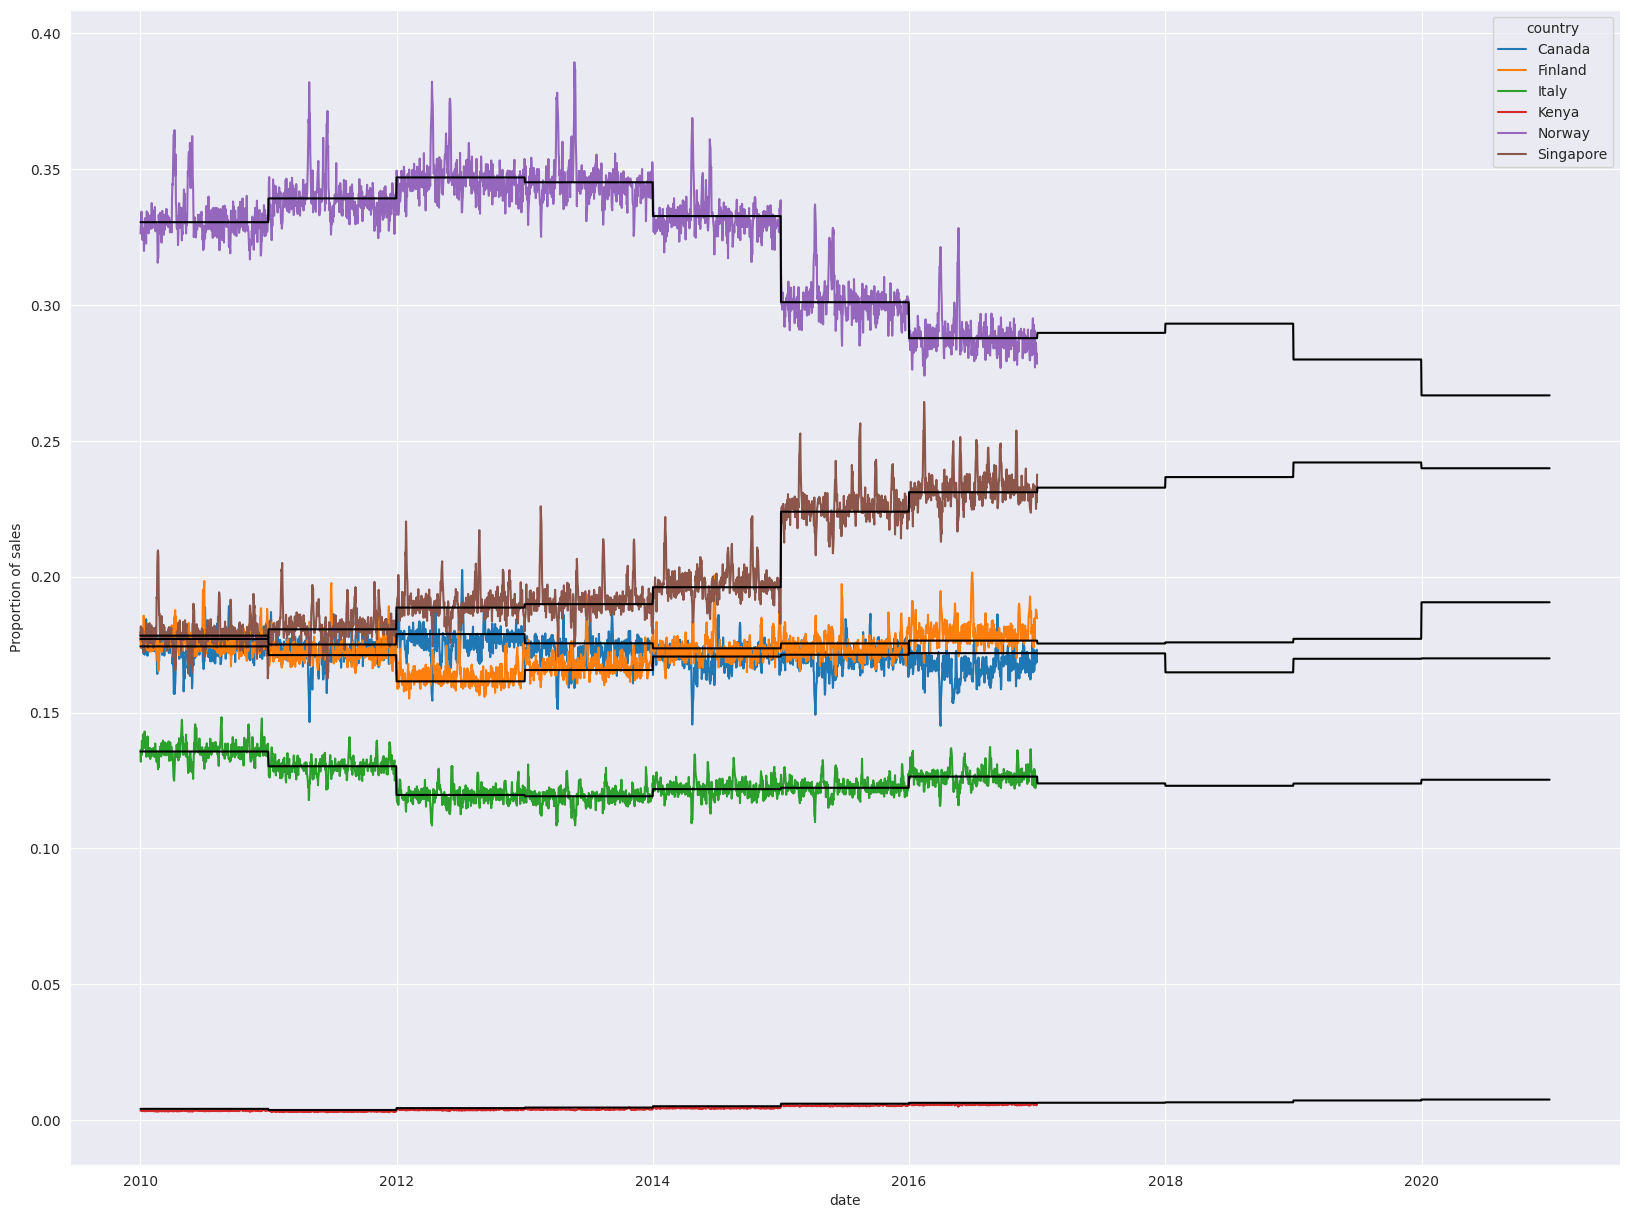

In [ ]:
gdp_df = pd.read_csv("dataset/gdp.csv")
years =  ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]

gdp_filtered_df = gdp_df.loc[gdp_df["Country Name"].isin(train_df["country"].unique()), ["Country Name"] + years].set_index("Country Name")

gdp_filtered_df["2010_ratio"] = gdp_filtered_df["2010"] / gdp_filtered_df.sum()["2010"]

for year in years:
  gdp_filtered_df[f"{year}_ratio"] = gdp_filtered_df[year] / gdp_filtered_df.sum()[year]
  
gdp_filtered_ratio_df = gdp_filtered_df[[i+"_ratio" for i in years]]
gdp_filtered_ratio_df.columns = [int(i) for i in years]
gdp_filtered_ratio_df = gdp_filtered_ratio_df.unstack().reset_index().rename(columns= {"level_0":"year", 0: "ratio", "Country Name": "country"})
gdp_filtered_ratio_df["year"] = pd.to_datetime(gdp_filtered_ratio_df["year"], format="%Y")

gdp_filtered_ratio_df2 = gdp_filtered_ratio_df.copy()
gdp_filtered_ratio_df2["year"] = pd.to_datetime(gdp_filtered_ratio_df2["year"].astype(str)) + pd.offsets.YearEnd(1)
gdp_filtered_ratio_df = pd.concat([gdp_filtered_ratio_df, gdp_filtered_ratio_df2]).reset_index()

f, ax = plt.subplots(figsize=(20, 15))
sns.lineplot(data=country_ratio_over_time, x="date", y="num_sold", hue="country");
sns.lineplot(data=gdp_filtered_ratio_df, x="year", y="ratio", hue="country", palette=["black"]*6, legend=False)
ax.set_ylabel("Proportion of sales")


In [ ]:
gdp_filtered_ratio_df2["year"] = gdp_filtered_ratio_df2["year"].dt.year
def plot_adjust_country(df):
  new_df = df.copy()
  new_df["year"] = new_df["date"].dt.year
  for country in new_df["country"].unique():
    for year in new_df["year"].unique():
      ratio_values = gdp_filtered_ratio_df2.loc[(new_df["country"] == country) & (new_df["year"] == year), "ratio"].values
      if len(ratio_values) > 0:
        ratio = ratio_values[0]
      else:
        ratio = 1
      new_df.loc[(new_df["country"] == country) & (new_df["year"] == year), "num_sold"] = new_df.loc[(new_df["country"] == country) & (new_df["year"] == year), "num_sold"] / ratio

  plot_all(new_df)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

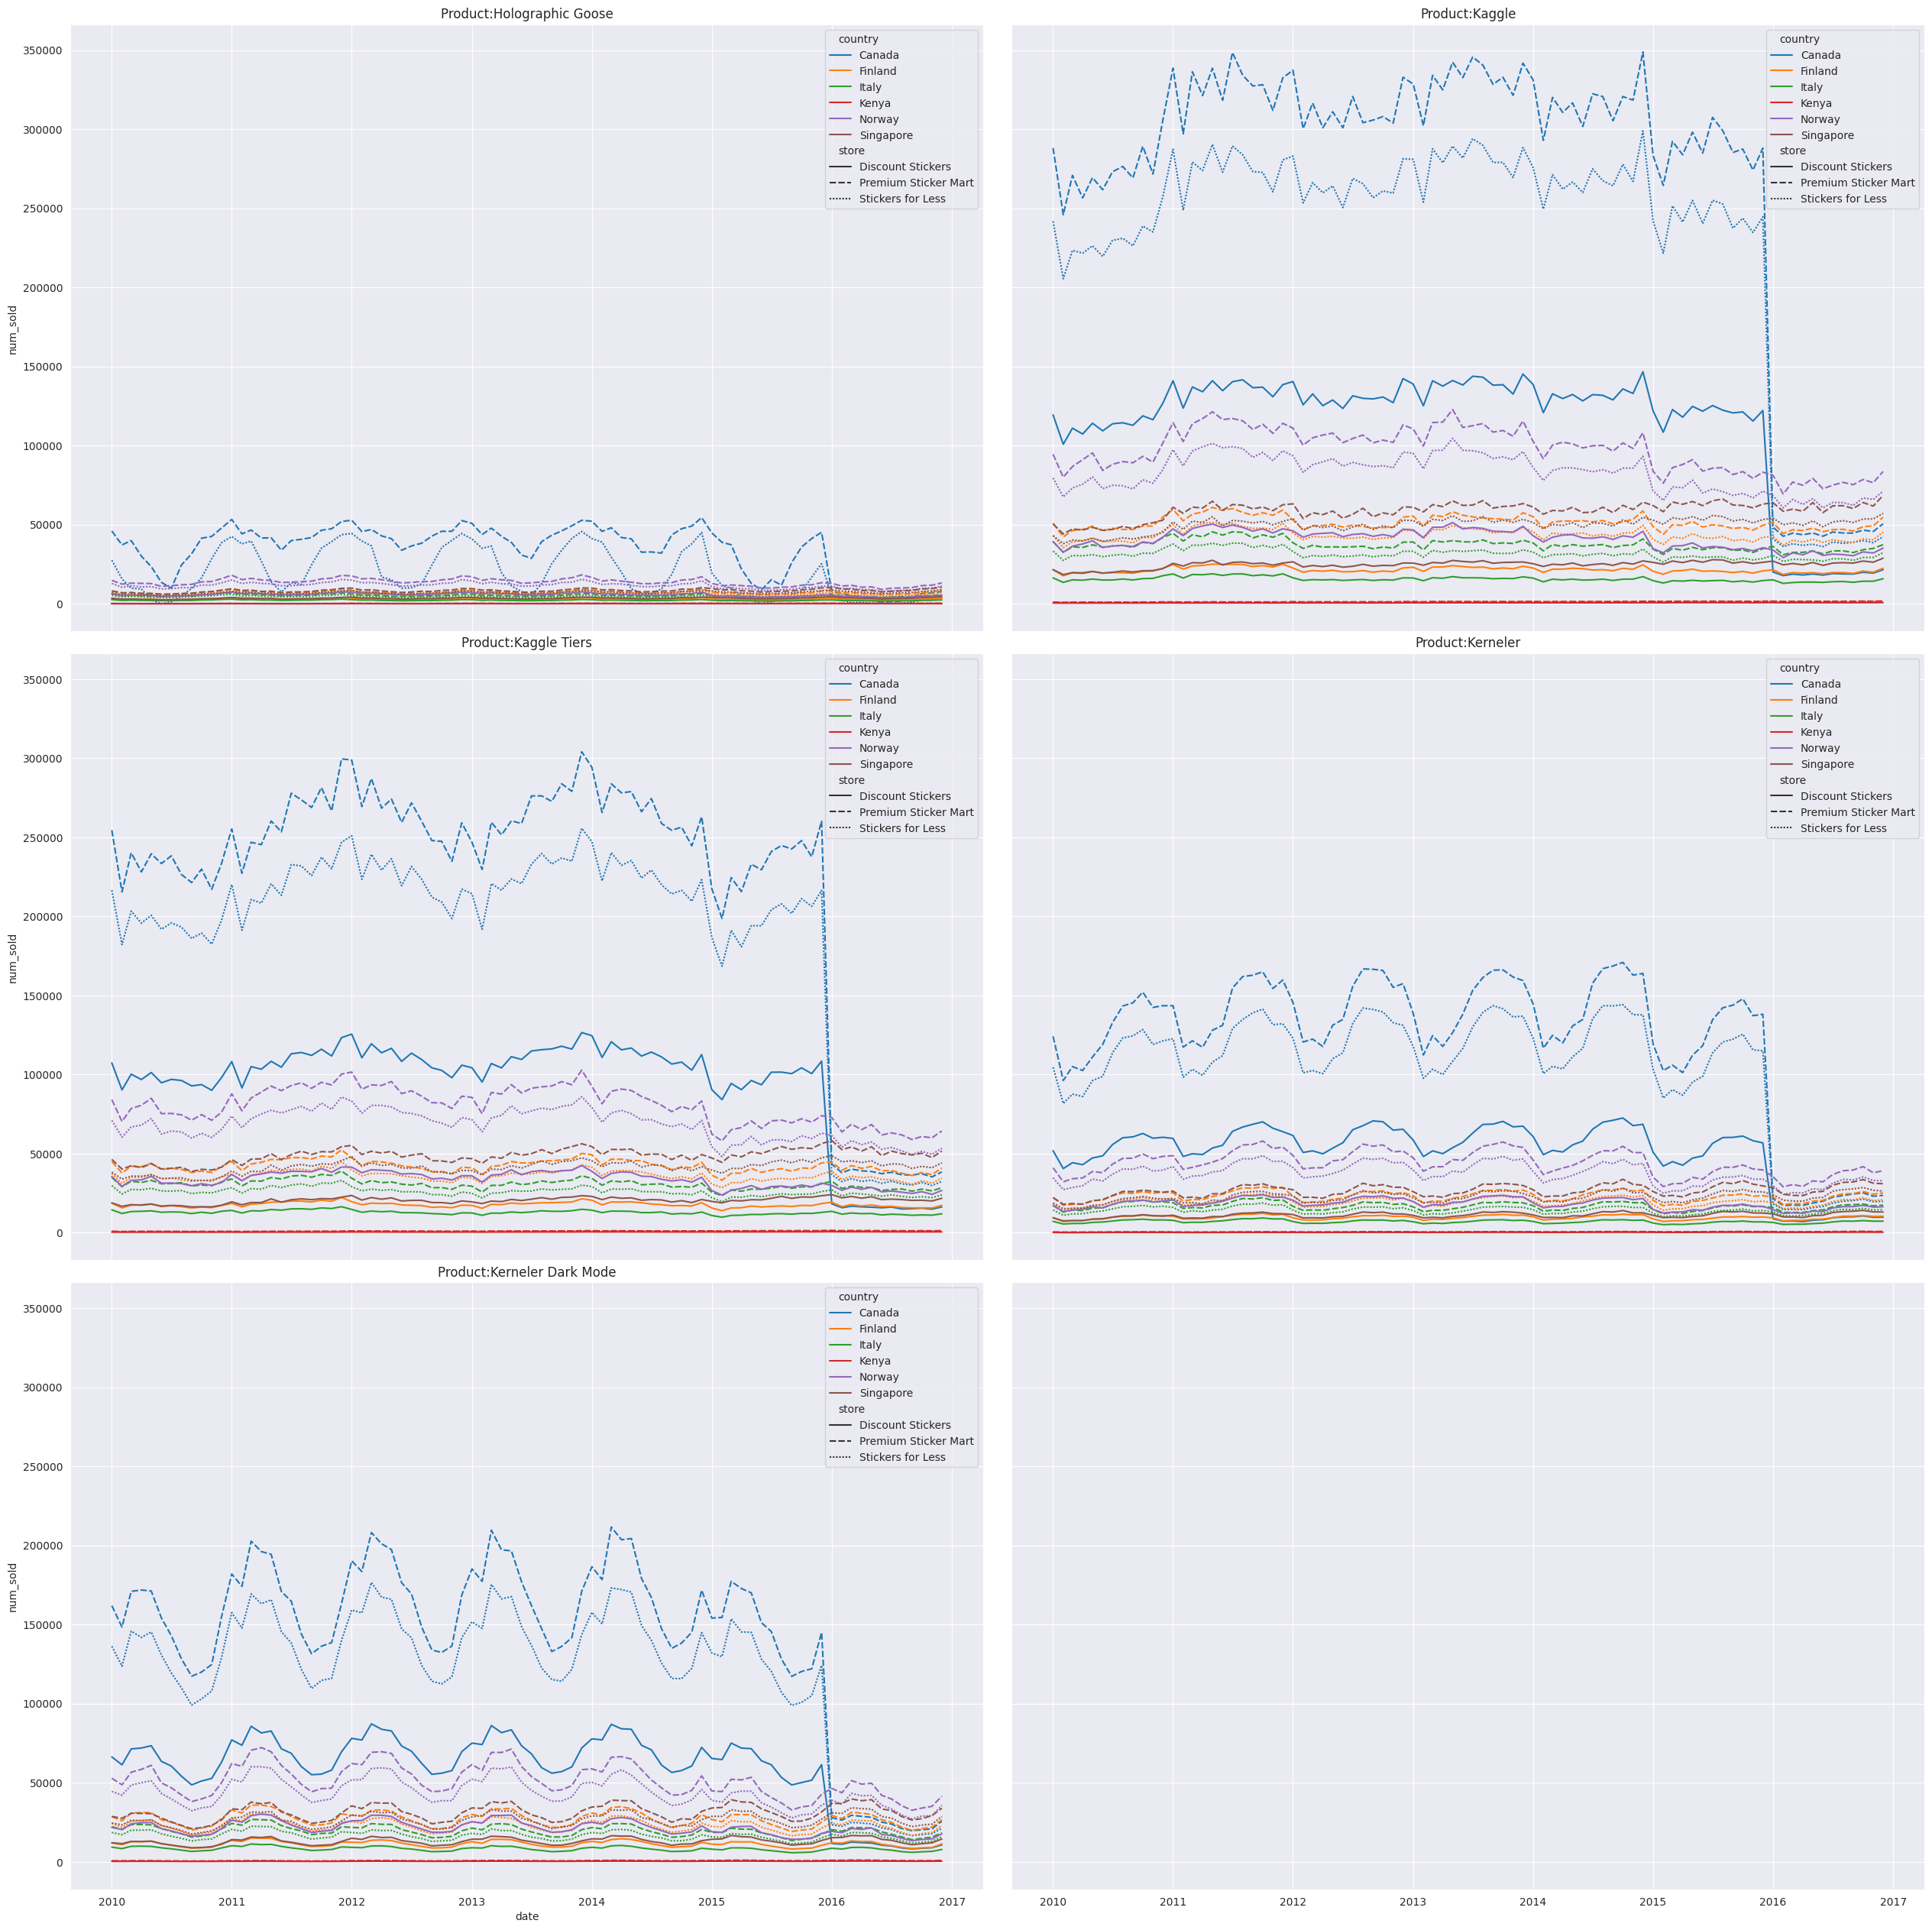

In [ ]:
plot_adjust_country(monthly_df)

In [ ]:
train_df_imputed = train_df.copy()
print(f"Missing values remaining: {train_df_imputed['num_sold'].isna().sum()}")

train_df_imputed["year"] = train_df_imputed["date"].dt.year
for year in train_df_imputed["year"].unique():
    # Impute Time Series 1 (Canada, Discount Stickers, Holographic Goose)
    print(gdp_filtered_ratio_df2)
    target_ratio = gdp_filtered_ratio_df2.loc[(gdp_filtered_ratio_df2["year"] == year) & (gdp_filtered_ratio_df2["country"] == "Norway"), "ratio"].values[0] # Using Norway as should have the best precision
    current_raito = gdp_filtered_ratio_df2.loc[(gdp_filtered_ratio_df2["year"] == year) & (gdp_filtered_ratio_df2["country"] == "Canada"), "ratio"].values[0]
    ratio_can = current_raito / target_ratio
    train_df_imputed.loc[(train_df_imputed["country"] == "Canada") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year), "num_sold"] * ratio_can).values
    
    # Impute Time Series 2 (Only Missing Values)
    current_ts =  train_df_imputed.loc[(train_df_imputed["country"] == "Canada") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year)]
    missing_ts_dates = current_ts.loc[current_ts["num_sold"].isna(), "date"]
    train_df_imputed.loc[(train_df_imputed["country"] == "Canada") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] * ratio_can).values

    # Impute Time Series 3 (Only Missing Values)
    current_ts =  train_df_imputed.loc[(train_df_imputed["country"] == "Canada") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year)]
    missing_ts_dates = current_ts.loc[current_ts["num_sold"].isna(), "date"]
    train_df_imputed.loc[(train_df_imputed["country"] == "Canada") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] * ratio_can).values
    
    # Impute Time Series 4 (Kenya, Discount Stickers, Holographic Goose)
    current_raito = gdp_filtered_ratio_df2.loc[(gdp_filtered_ratio_df2["year"] == year) & (gdp_filtered_ratio_df2["country"] == "Kenya"), "ratio"].values[0]
    ratio_ken = current_raito / target_ratio
    train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Holographic Goose")& (train_df_imputed["year"] == year), "num_sold"] * ratio_ken).values

    # Impute Time Series 5 (Only Missing Values)
    current_ts = train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year)]
    missing_ts_dates = current_ts.loc[current_ts["num_sold"].isna(), "date"]
    train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Premium Sticker Mart") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] * ratio_ken).values

    # Impute Time Series 6 (Only Missing Values)
    current_ts = train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year)]
    missing_ts_dates = current_ts.loc[current_ts["num_sold"].isna(), "date"]
    train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Stickers for Less") & (train_df_imputed["product"] == "Holographic Goose") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] * ratio_ken).values

    # Impute Time Series 7 (Only Missing Values)
    current_ts = train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Kerneler") & (train_df_imputed["year"] == year)]
    missing_ts_dates = current_ts.loc[current_ts["num_sold"].isna(), "date"]
    train_df_imputed.loc[(train_df_imputed["country"] == "Kenya") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Kerneler") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] = (train_df_imputed.loc[(train_df_imputed["country"] == "Norway") & (train_df_imputed["store"] == "Discount Stickers") & (train_df_imputed["product"] == "Kerneler") & (train_df_imputed["year"] == year) & (train_df_imputed["date"].isin(missing_ts_dates)), "num_sold"] * ratio_ken).values
    
print(f"Missing values remaining: {train_df_imputed['num_sold'].isna().sum()}")

Missing values remaining: 8871
    year    country     ratio
0   2010     Canada  0.178301
1   2010    Finland  0.174349
2   2010      Italy  0.135654
3   2010      Kenya  0.004092
4   2010     Norway  0.330517
..   ...        ...       ...
61  2020    Finland  0.190594
62  2020      Italy  0.125263
63  2020      Kenya  0.007524
64  2020     Norway  0.266753
65  2020  Singapore  0.239924

[66 rows x 3 columns]
    year    country     ratio
0   2010     Canada  0.178301
1   2010    Finland  0.174349
2   2010      Italy  0.135654
3   2010      Kenya  0.004092
4   2010     Norway  0.330517
..   ...        ...       ...
61  2020    Finland  0.190594
62  2020      Italy  0.125263
63  2020      Kenya  0.007524
64  2020     Norway  0.266753
65  2020  Singapore  0.239924

[66 rows x 3 columns]
    year    country     ratio
0   2010     Canada  0.178301
1   2010    Finland  0.174349
2   2010      Italy  0.135654
3   2010      Kenya  0.004092
4   2010     Norway  0.330517
..   ...        ...    

In [ ]:
missing_rows = train_df_imputed.loc[train_df_imputed["num_sold"].isna()]
display(missing_rows)
train_df_imputed.loc[train_df_imputed["id"] == 23719, "num_sold"] = 4
train_df_imputed.loc[train_df_imputed["id"] == 207003, "num_sold"] = 195

print(f"Missing values remaining: {train_df_imputed['num_sold'].isna().sum()}")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


id       date country              store             product  \
23719    23719 2010-09-21   Kenya  Discount Stickers  Kerneler Dark Mode   
207003  207003 2016-04-19  Canada  Discount Stickers            Kerneler   

        num_sold  year  
23719        NaN  2010  
207003       NaN  2016

Missing values remaining: 0


In [ ]:
weekly_df = train_df_imputed.groupby(["country", "store", "product", pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df_imputed.groupby(["country", "store", "product", pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

In [ ]:
store_weights = train_df_imputed.groupby("store")["num_sold"].sum() / train_df_imputed["num_sold"].sum()
store_weights

store
Discount Stickers       0.184710
Premium Sticker Mart    0.441570
Stickers for Less       0.373719
Name: num_sold, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Text(0, 0.5, 'Proportion of sales')

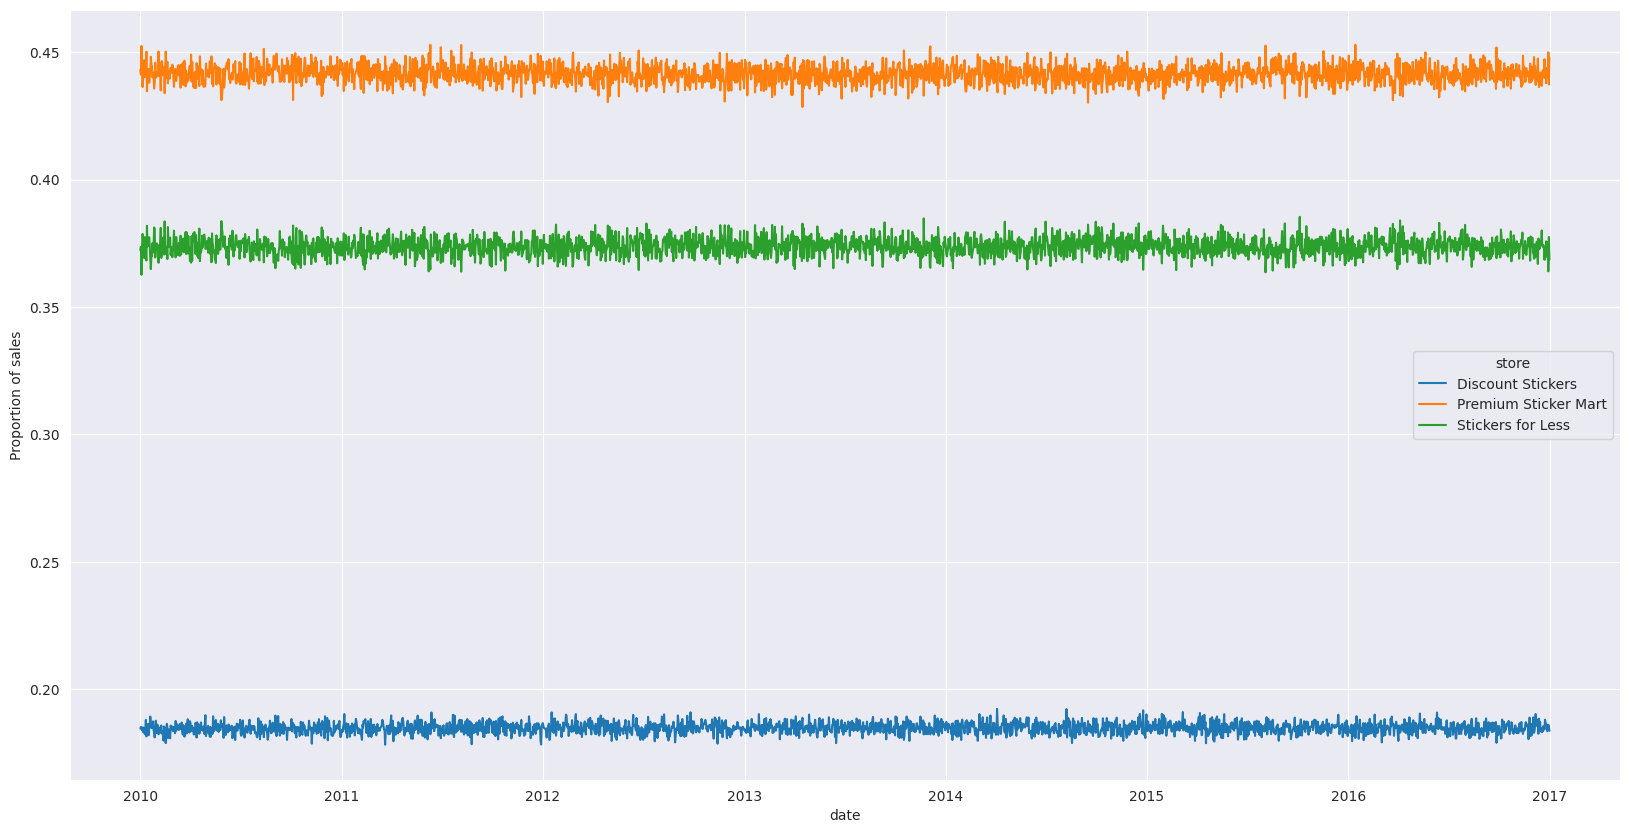

In [ ]:
store_ratio_over_time = (train_df_imputed.groupby(["date", "store"])["num_sold"].sum() / train_df_imputed.groupby(["date"])["num_sold"].sum()).reset_index()
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=store_ratio_over_time, x="date", y="num_sold", hue="store");
ax.set_ylabel("Proportion of sales")

In [ ]:
def plot_adjust_store(df):
  new_df = df.copy()
  weights = store_weights.loc["Premium Sticker Mart"] / store_weights
  print(weights)
  for store in weights.index:
    new_df.loc[new_df["store"] == store, "num_sold"] = new_df.loc[new_df["store"] == store, "num_sold"] * weights[store]
  plot_all(new_df)

store
Discount Stickers       2.390613
Premium Sticker Mart    1.000000
Stickers for Less       1.181556
Name: num_sold, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

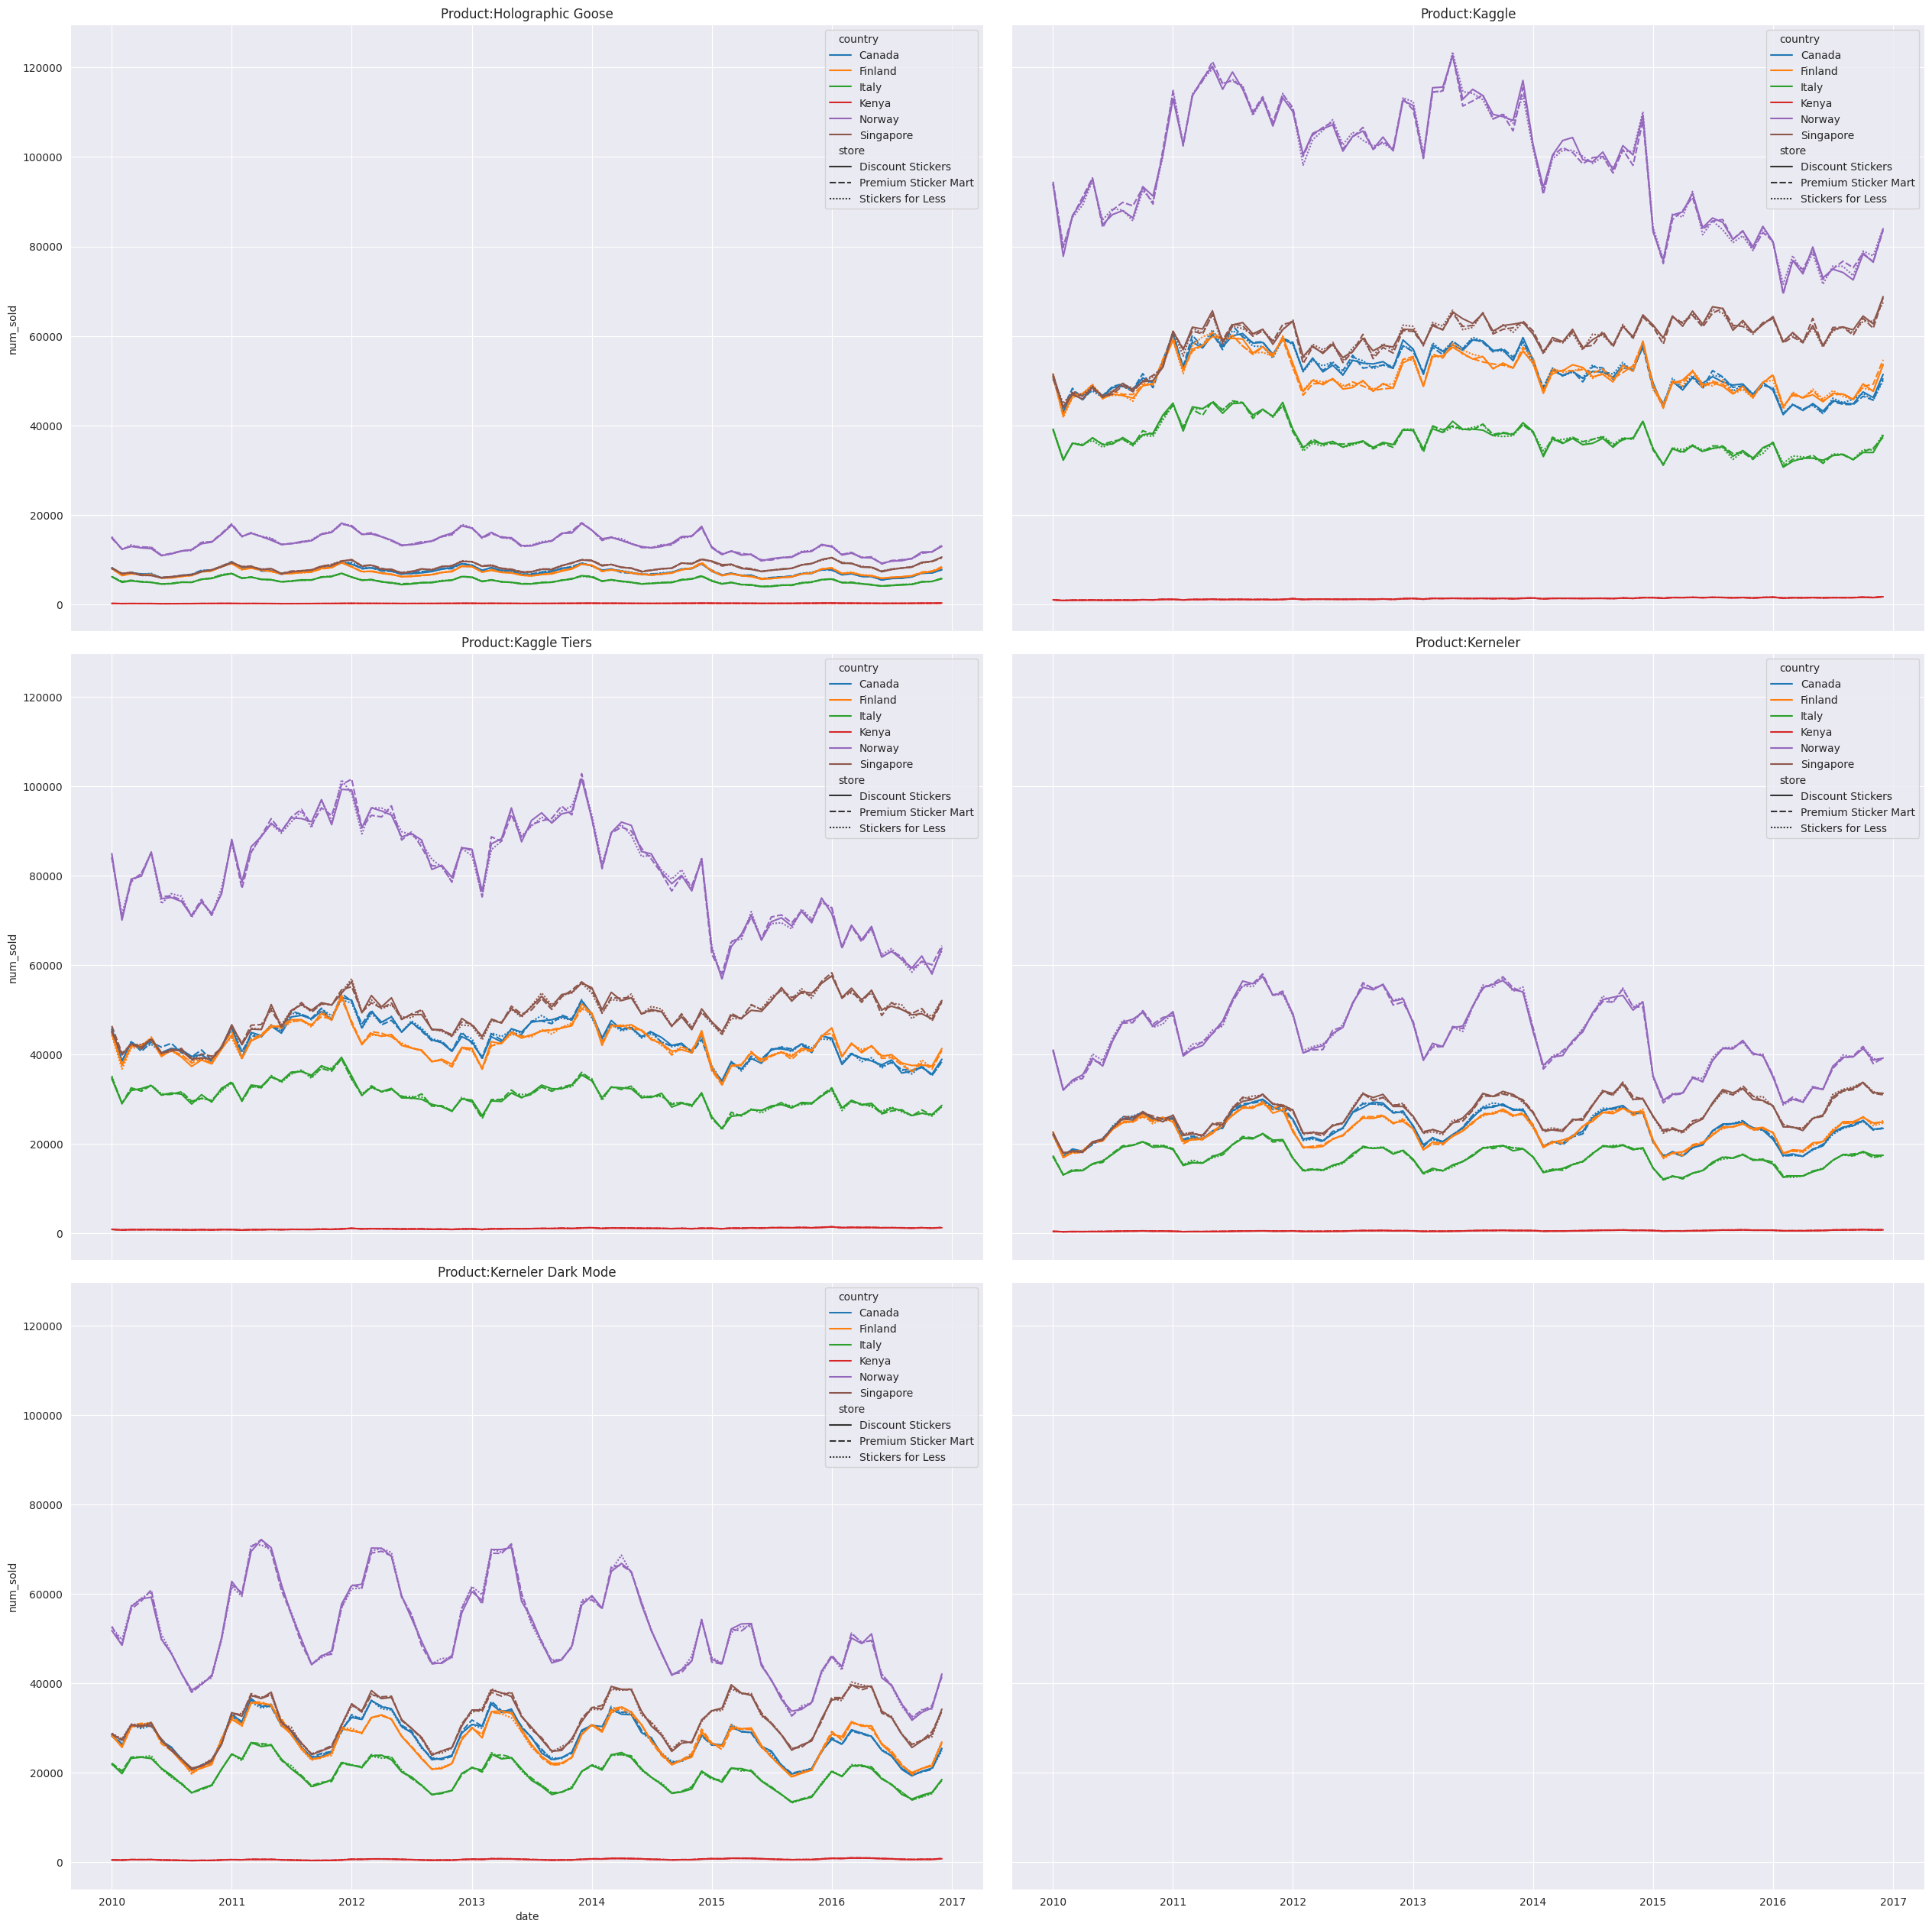

In [ ]:
plot_adjust_store(monthly_df)

In [ ]:
product_df = train_df_imputed.groupby(["date", "product"]).sum().reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

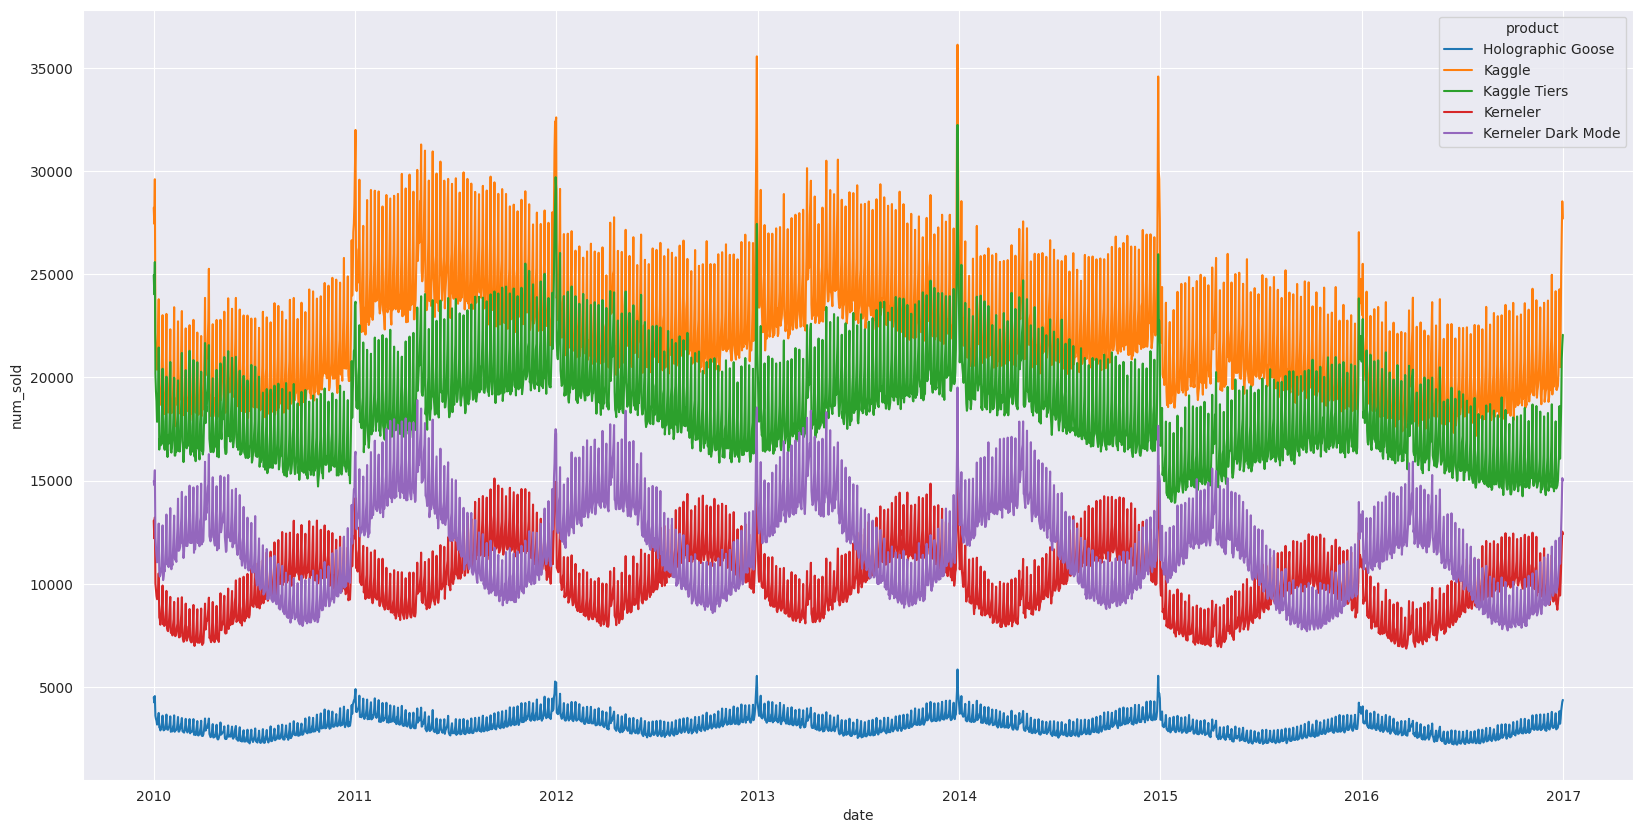

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=product_df, x="date", y="num_sold", hue="product");

In [ ]:
product_ratio_df = product_df.pivot(index="date", columns="product", values="num_sold")
product_ratio_df = product_ratio_df.apply(lambda x: x/x.sum(), axis=1)
print(product_ratio_df)

product_ratio_df = product_ratio_df.stack().rename("ratios").reset_index()
product_ratio_df.head(5)

product     Holographic Goose    Kaggle  Kaggle Tiers  Kerneler  \
date                                                              
2010-01-01           0.052433  0.329308      0.291168  0.152374   
2010-01-02           0.051321  0.331865      0.290559  0.147510   
2010-01-03           0.051498  0.334636      0.289278  0.149364   
2010-01-04           0.052830  0.325014      0.295852  0.146907   
2010-01-05           0.052416  0.327897      0.293537  0.147133   
...                       ...       ...           ...       ...   
2016-12-27           0.053306  0.342669      0.267187  0.155681   
2016-12-28           0.054106  0.351653      0.260947  0.154901   
2016-12-29           0.052509  0.348107      0.269317  0.152357   
2016-12-30           0.052092  0.347905      0.262959  0.152704   
2016-12-31           0.053584  0.339651      0.270559  0.152139   

product     Kerneler Dark Mode  
date                            
2010-01-01            0.174717  
2010-01-02            0.17874

date             product    ratios
0 2010-01-01   Holographic Goose  0.052433
1 2010-01-01              Kaggle  0.329308
2 2010-01-01        Kaggle Tiers  0.291168
3 2010-01-01            Kerneler  0.152374
4 2010-01-01  Kerneler Dark Mode  0.174717

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='date', ylabel='ratios'>

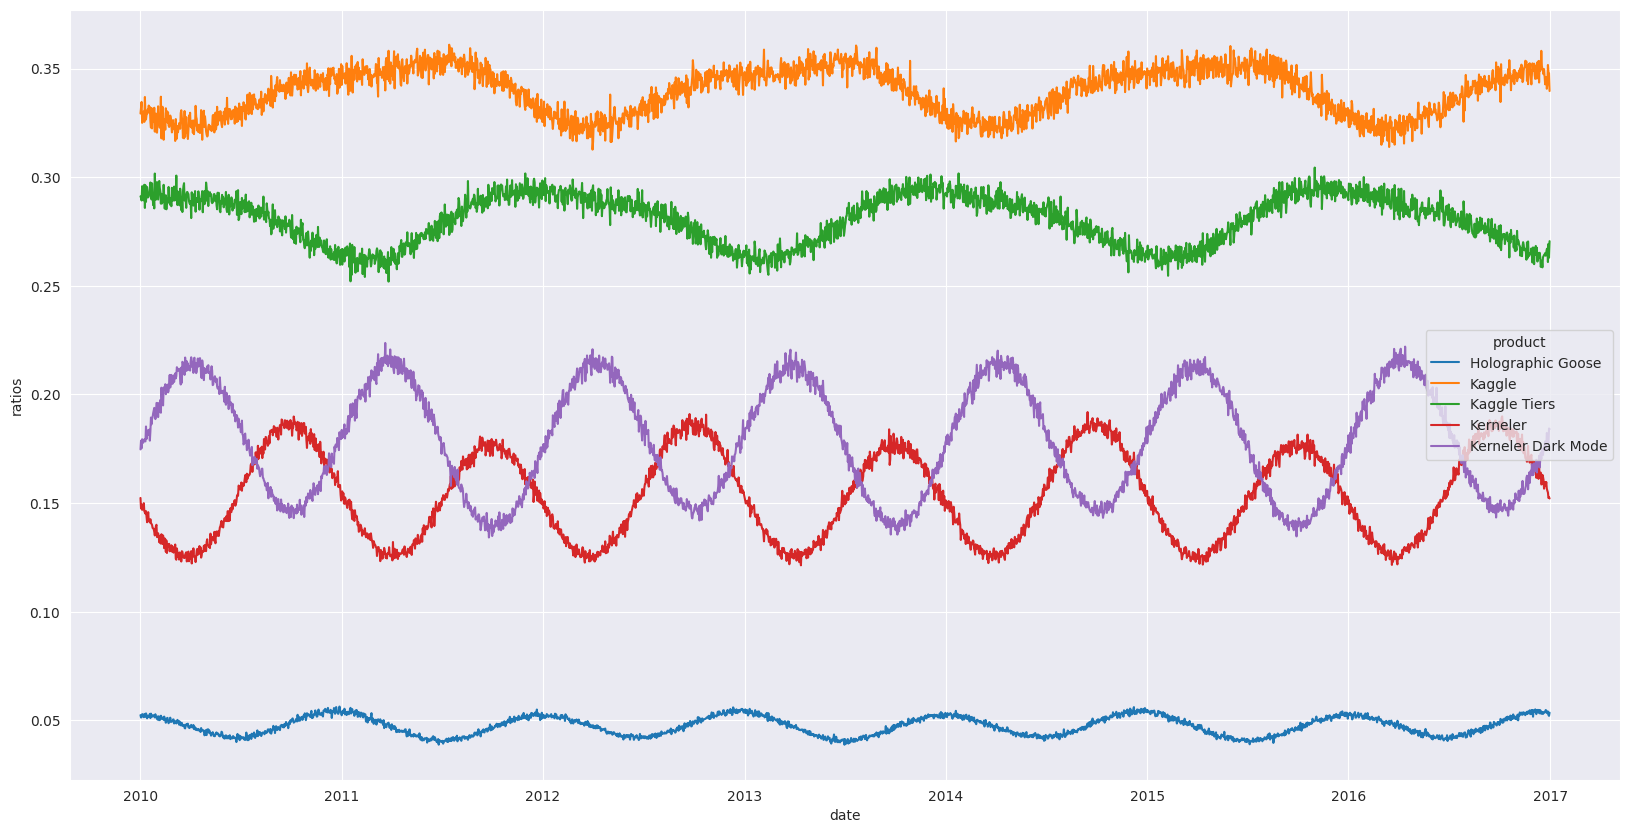

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=product_ratio_df, x="date", y="ratios", hue="product")

In [ ]:
original_train_df_imputed = train_df_imputed.copy()
print(original_train_df_imputed)
train_df_imputed = train_df_imputed.groupby(["date"])["num_sold"].sum().reset_index()

           date      num_sold  month  day_of_week  day_of_year
0    2010-01-01  85710.030833      1            4            1
1    2010-01-02  82699.204783      1            5            2
2    2010-01-03  88475.341887      1            6            3
3    2010-01-04  68206.329432      1            0            4
4    2010-01-05  65831.631772      1            1            5
...         ...           ...    ...          ...          ...
2552 2016-12-27  64651.328189     12            1          361
2553 2016-12-28  71252.137389     12            2          362
2554 2016-12-29  77547.993209     12            3          363
2555 2016-12-30  82028.041063     12            4          364
2556 2016-12-31  81557.136772     12            5          365

[2557 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

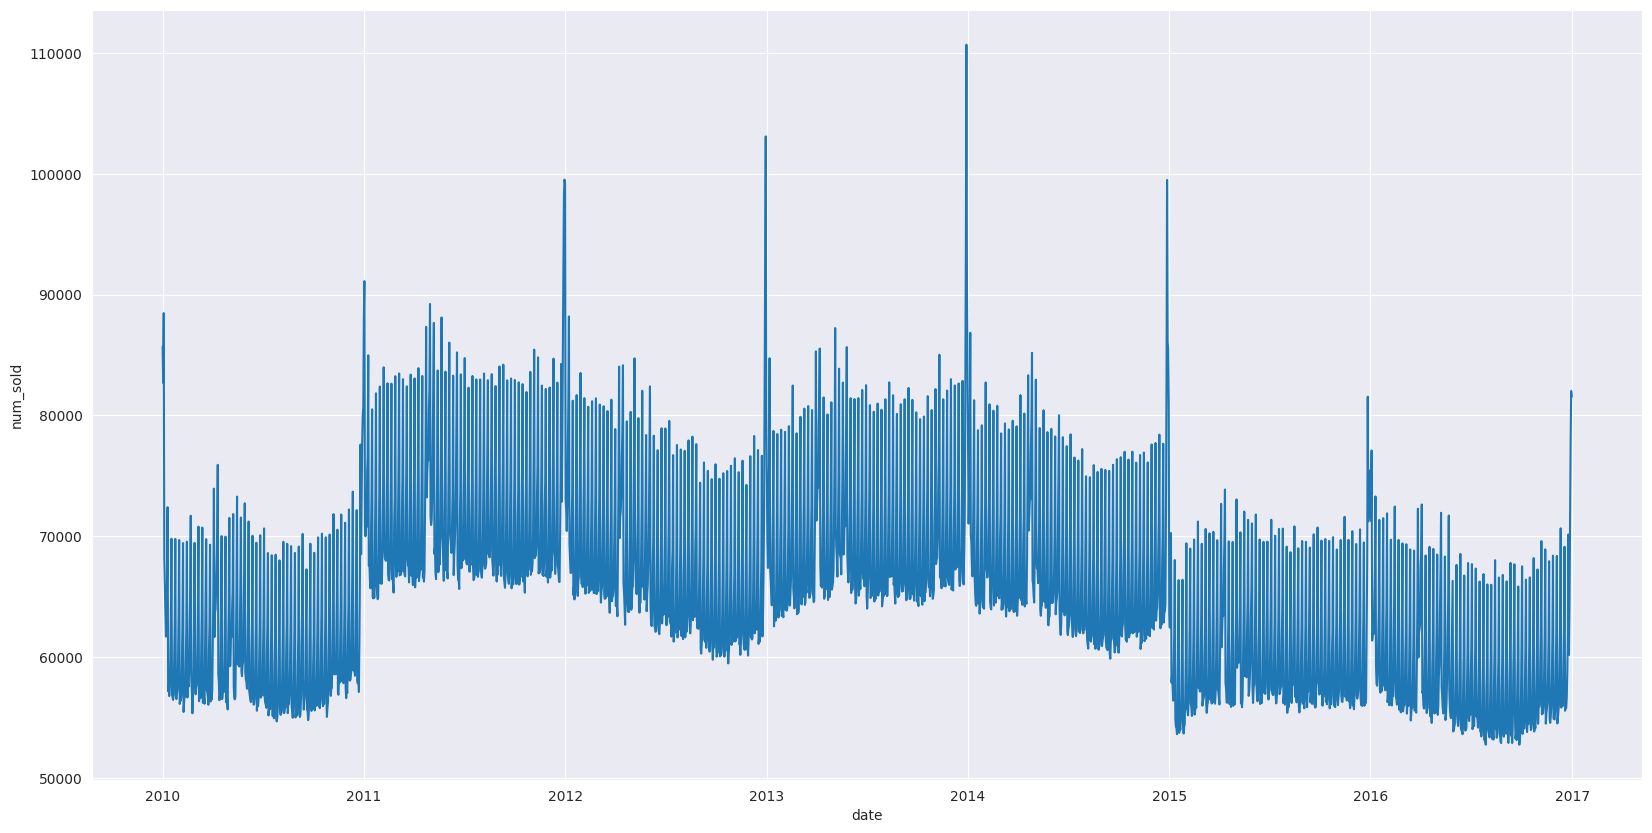

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=train_df_imputed, x="date", y="num_sold")

In [ ]:
weekly_df = train_df.groupby([pd.Grouper(key="date", freq="W")])["num_sold"].sum().rename("num_sold").reset_index()
monthly_df = train_df.groupby([pd.Grouper(key="date", freq="MS")])["num_sold"].sum().rename("num_sold").reset_index()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


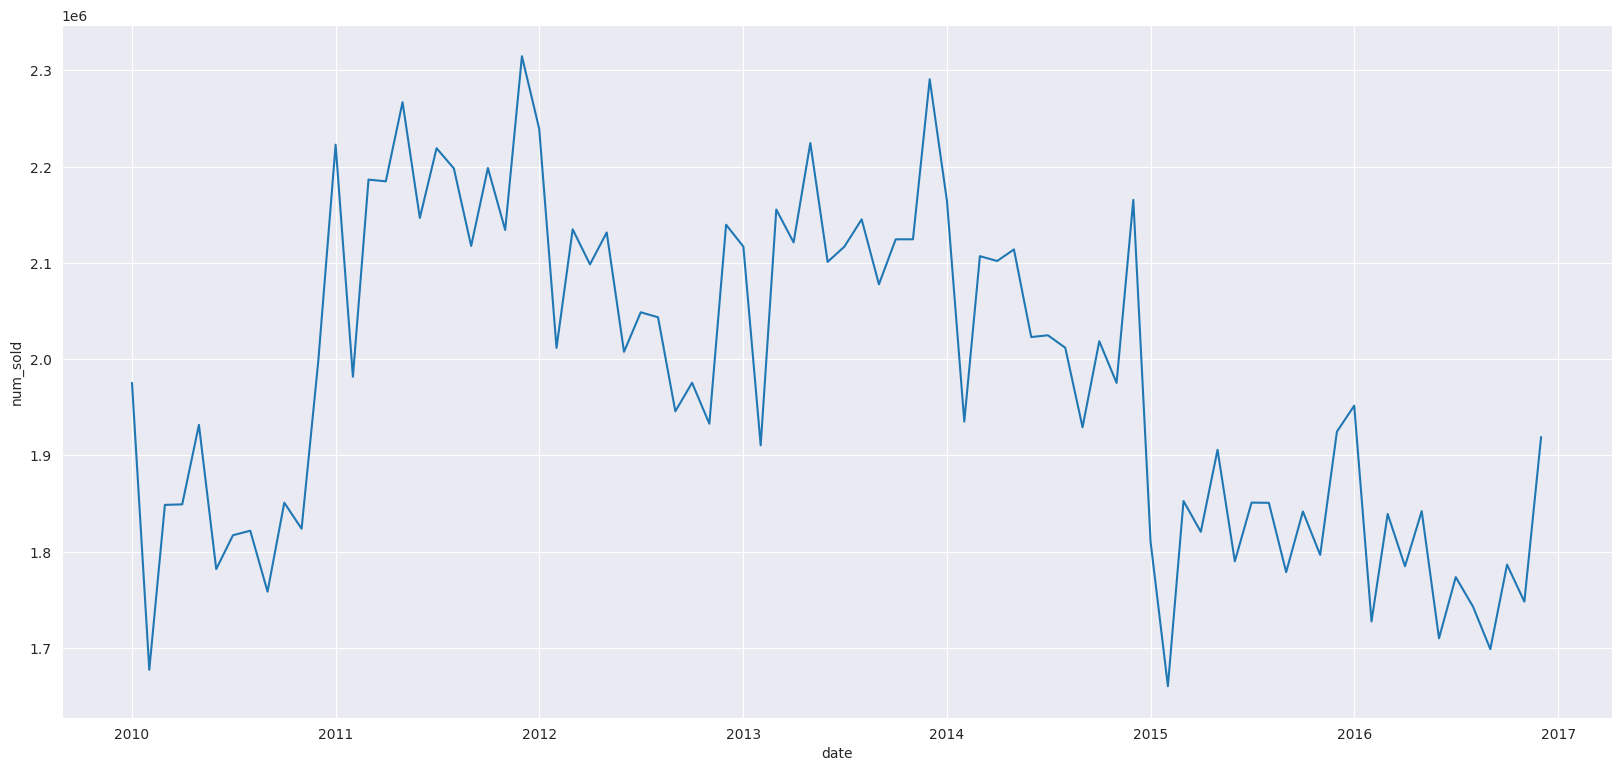

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.lineplot(data=monthly_df, x="date", y="num_sold");

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

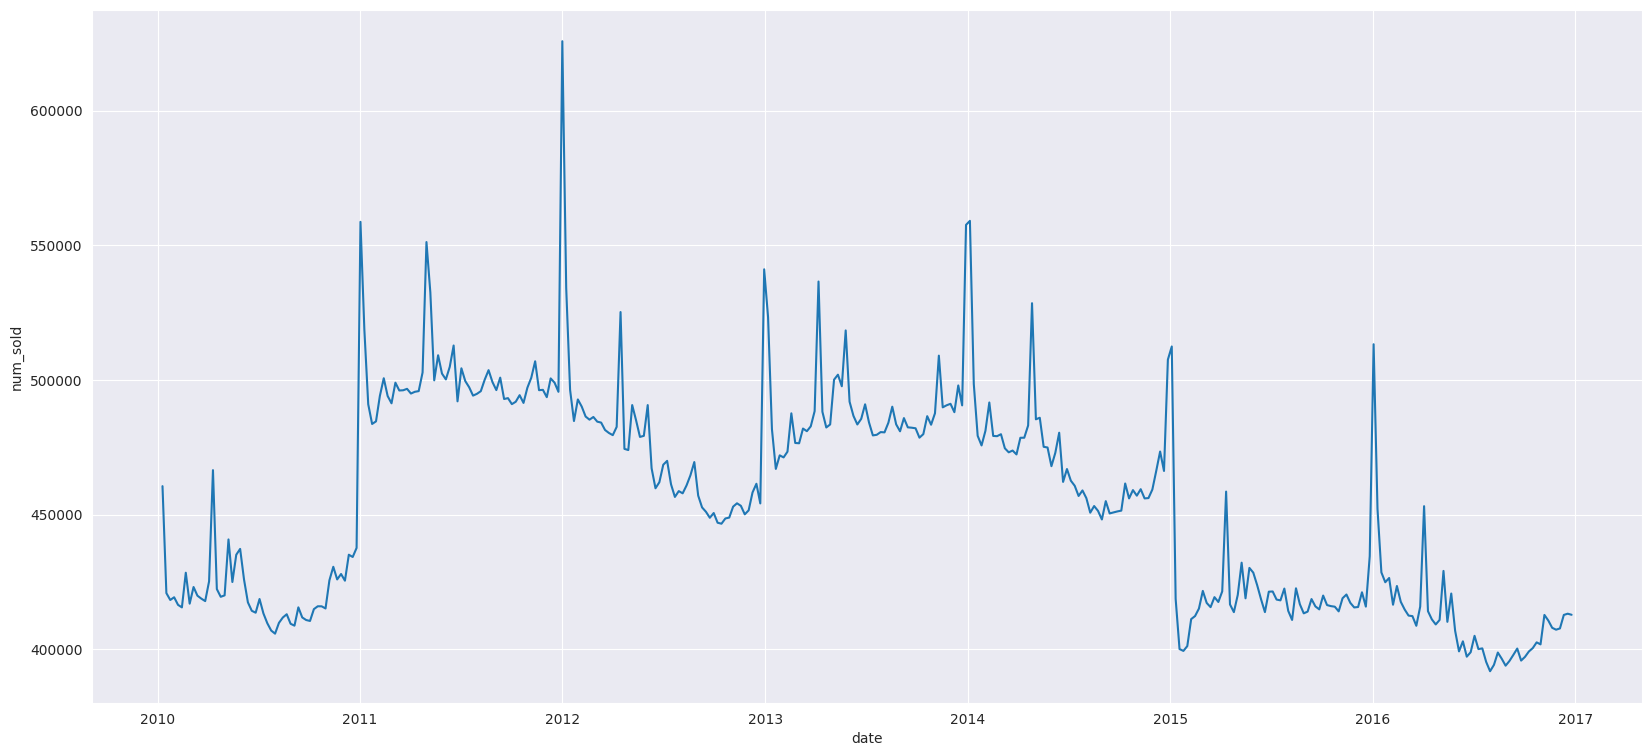

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.lineplot(data=weekly_df[1:-1], x="date", y="num_sold")

In [ ]:
def plot_seasonality(df, x_axis):
  df["month"] = df["date"].dt.month
  df["day_of_week"] = df["date"].dt.dayofweek
  df["day_of_year"] = df["date"].apply(
    lambda x: x.timetuple().tm_yday if not (x.is_leap_year and x.month > 2) else x.timetuple().tm_yday - 1 
  )
  
  f, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.lineplot(data=df, x=x_axis, y="num_sold", ax=ax);
  ax.set_title("{} Seasonality".format(x_axis))
  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


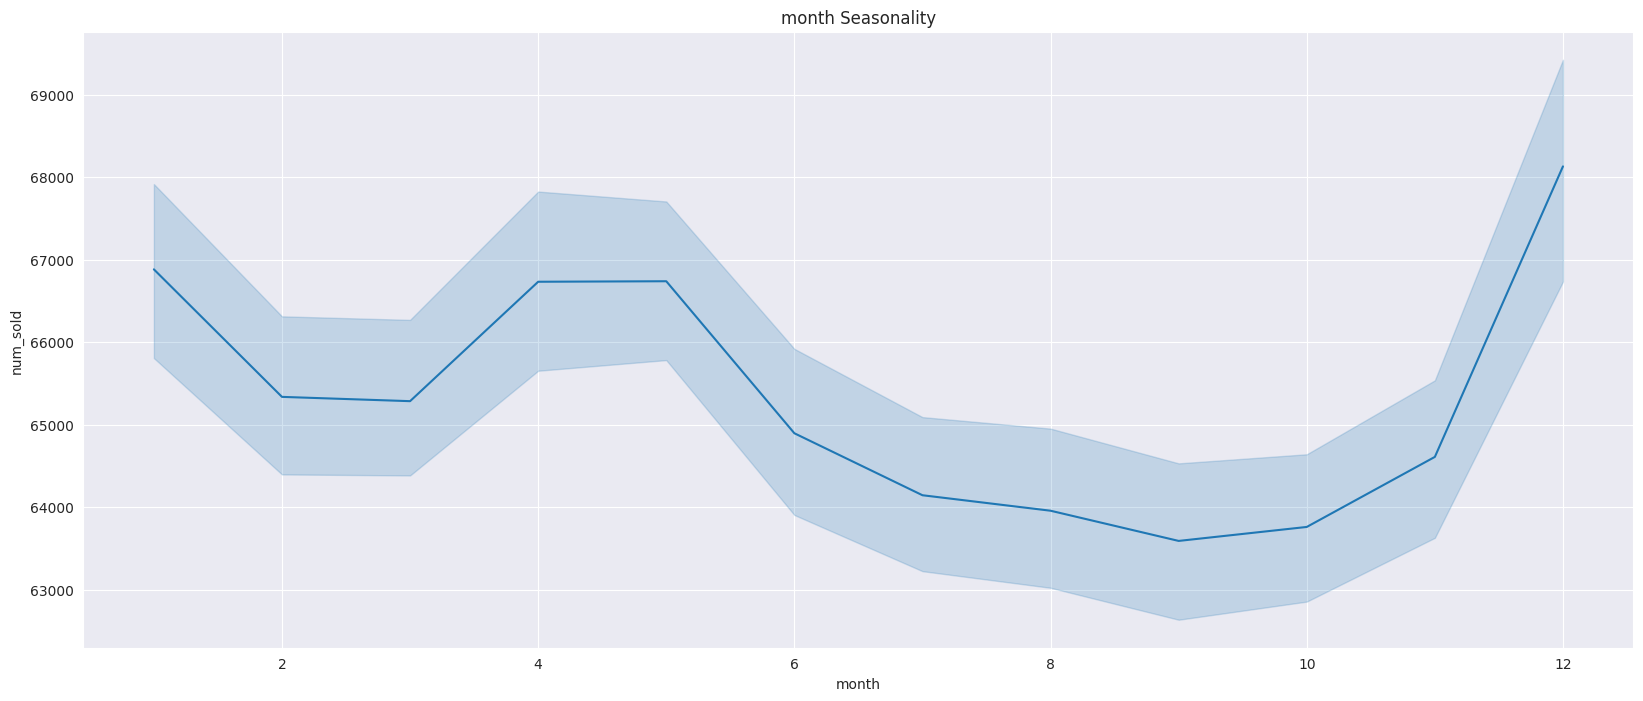

In [ ]:
plot_seasonality(train_df_imputed, "month")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


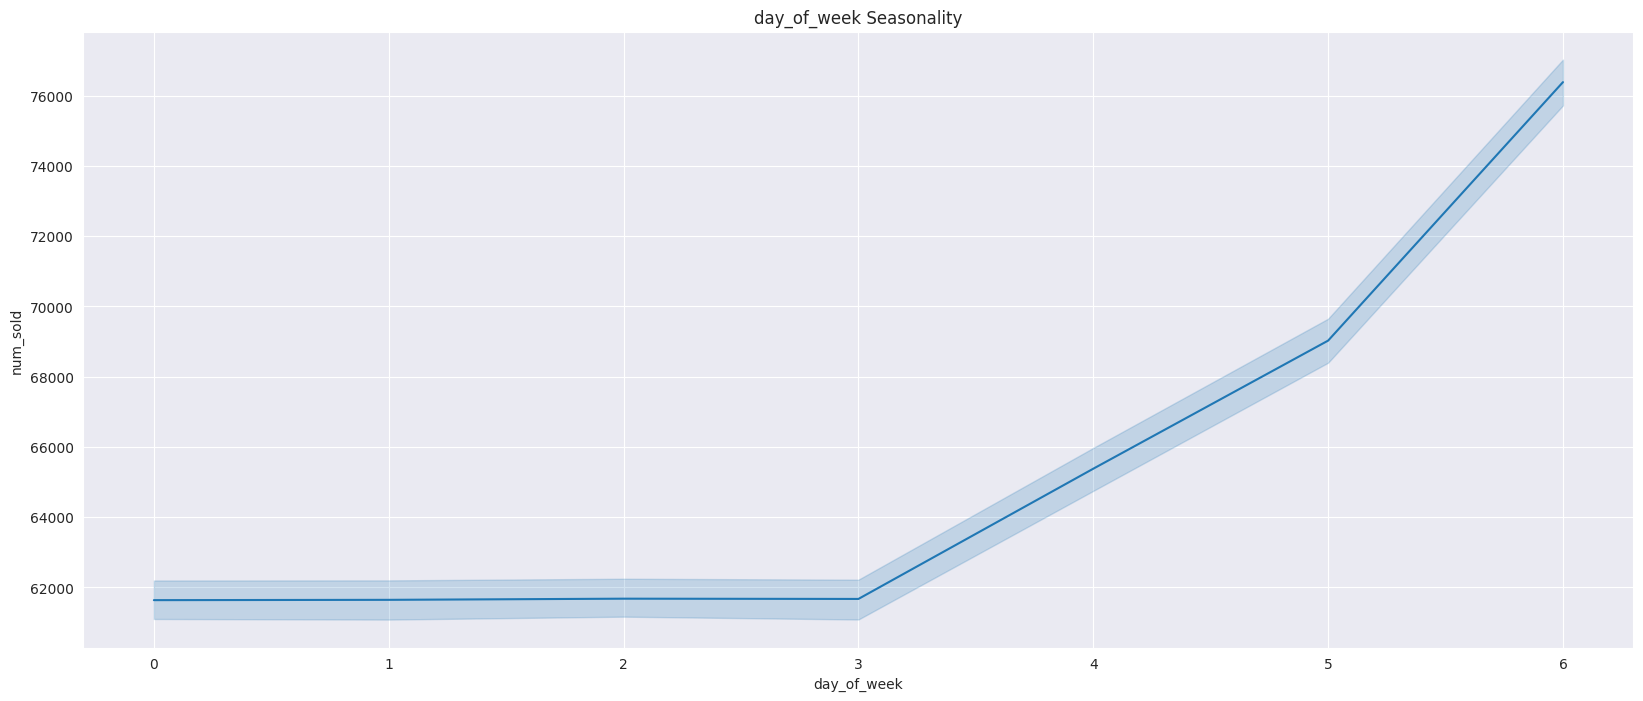

In [ ]:
plot_seasonality(train_df_imputed, "day_of_week")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


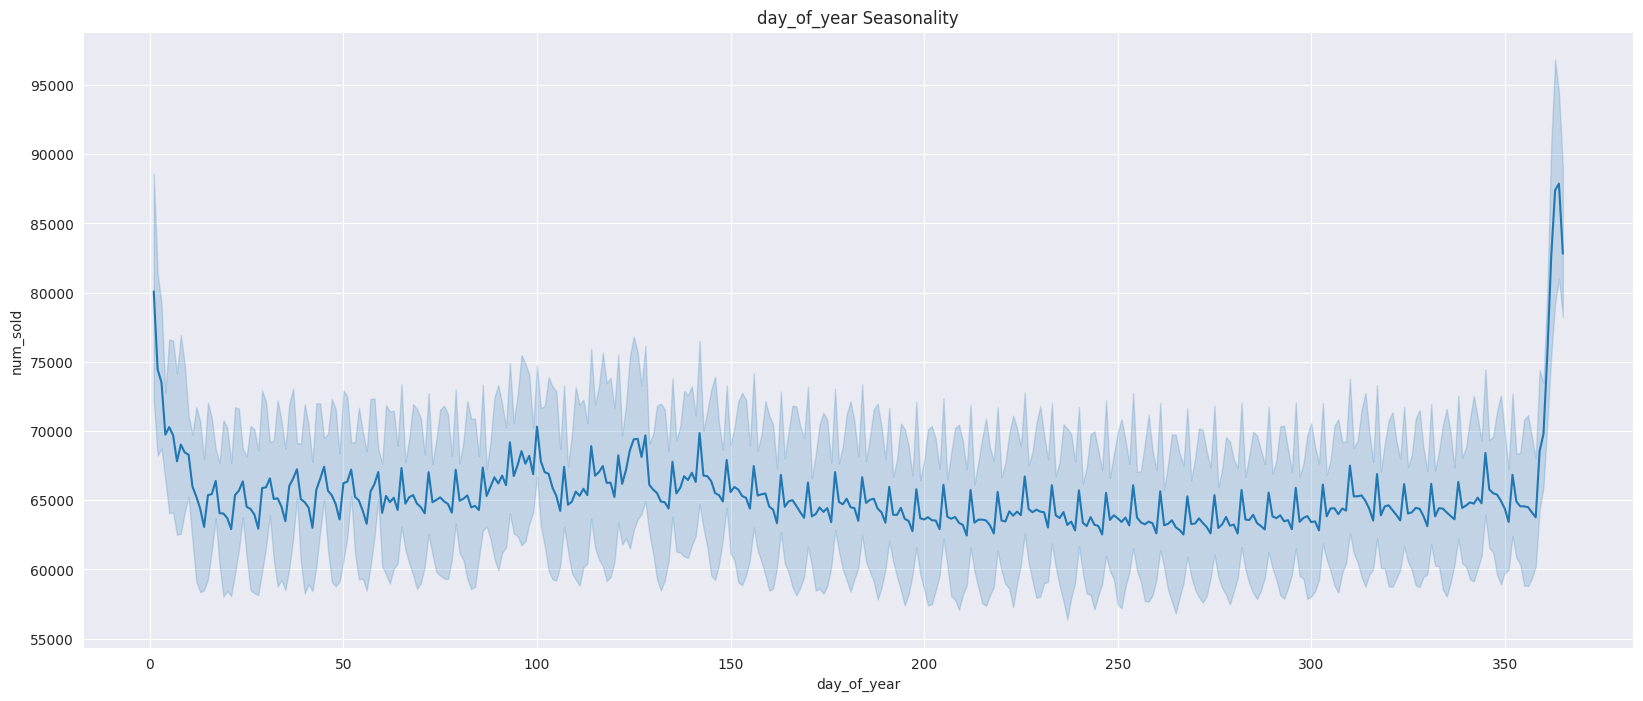

In [ ]:
plot_seasonality(train_df_imputed, "day_of_year")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


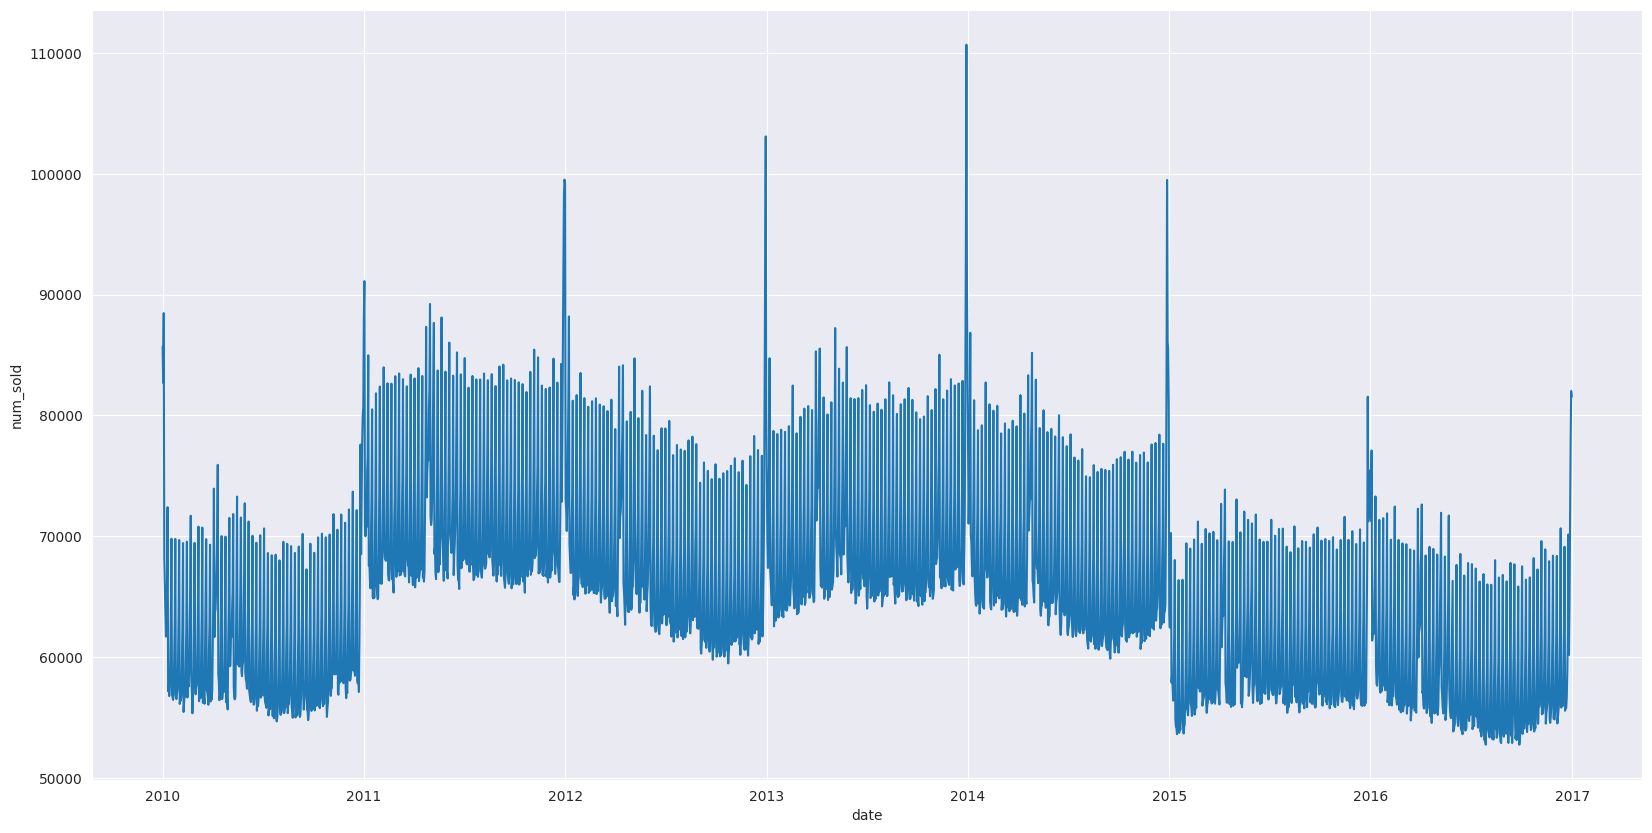

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=train_df_imputed, x="date", y="num_sold");

In [ ]:
test_total_sales_df = test_df.groupby(["date"])["id"].first().reset_index().drop(columns="id")
test_total_sales_dates = test_total_sales_df[["date"]]

           date
0    2017-01-01
1    2017-01-02
2    2017-01-03
3    2017-01-04
4    2017-01-05
...         ...
1090 2019-12-27
1091 2019-12-28
1092 2019-12-29
1093 2019-12-30
1094 2019-12-31

[1095 rows x 1 columns]


In [ ]:
def feature_engineer(df):
  new_df = df.copy()
  new_df["month"] = df["date"].dt.month
  new_df["month_sin"] = np.sin(new_df["month"] * (2 * np.pi / 12))
  new_df["month_cos"] = np.cos(new_df["month"] * (2 * np.pi / 12))
  new_df["day_of_week"] = df["date"].dt.dayofweek
  new_df["day_of_week"] = new_df["day_of_week"].apply(lambda x: 0 if x<=3 else( 1 if x==4 else( 2 if x == 5 else (3))))
  
  new_df["day_of_year"] = df["date"].apply(
    lambda x: x.timetuple().tm_yday if not (x.is_leap_year and x.month > 2) else x.timetuple().tm_yday - 1
  )
  new_df["day_sin"] = np.sin(new_df["day_of_year"] * (2 * np.pi / 365.0))
  new_df["day_cos"] = np.cos(new_df["day_of_year"] * (2 * np.pi / 365.0))
  
  new_df["important_dates"] = new_df["day_of_year"].apply(
    lambda x: x if x in [
      1,2,3,4,5,6,7,8,9,10,99, 100, 101, 125,126,355,256,357,358,359,360,361,362,363,364,365
    ] else 0
  )
  
  new_df = new_df.drop(columns=["date", "month", "day_of_year"])
  new_df = pd.get_dummies(new_df, columns=["important_dates", "day_of_week"], drop_first=True)
  
  return new_df

In [ ]:
train_total_sales_df = feature_engineer(train_df_imputed)
test_total_sales_df = feature_engineer(test_total_sales_df)

In [ ]:
display(train_total_sales_df.head(2))
display(test_total_sales_df.head(2))

num_sold  month_sin  month_cos   day_sin   day_cos  important_dates_1  \
0  85710.030833        0.5   0.866025  0.017213  0.999852               True   
1  82699.204783        0.5   0.866025  0.034422  0.999407              False   

   important_dates_2  important_dates_3  important_dates_4  important_dates_5  \
0              False              False              False              False   
1               True              False              False              False   

   ...  important_dates_359  important_dates_360  important_dates_361  \
0  ...                False                False                False   
1  ...                False                False                False   

   important_dates_362  important_dates_363  important_dates_364  \
0                False                False                False   
1                False                False                False   

   important_dates_365  day_of_week_1  day_of_week_2  day_of_week_3  
0                False           True          False          False  
1                False          False           True          False  

[2 rows x 34 columns]

month_sin  month_cos   day_sin   day_cos  important_dates_1  \
0        0.5   0.866025  0.017213  0.999852               True   
1        0.5   0.866025  0.034422  0.999407              False   

   important_dates_2  important_dates_3  important_dates_4  important_dates_5  \
0              False              False              False              False   
1               True              False              False              False   

   important_dates_6  ...  important_dates_359  important_dates_360  \
0              False  ...                False                False   
1              False  ...                False                False   

   important_dates_361  important_dates_362  important_dates_363  \
0                False                False                False   
1                False                False                False   

   important_dates_364  important_dates_365  day_of_week_1  day_of_week_2  \
0                False                False          False          False   
1                False                False          False          False   

   day_of_week_3  
0           True  
1          False  

[2 rows x 33 columns]

In [ ]:
y = train_total_sales_df["num_sold"]
X = train_total_sales_df.drop(columns="num_sold")
X_test = test_total_sales_df

In [ ]:
model = Ridge(tol=1e-2, max_iter=1000000, random_state=0)
model.fit(X, y)
preds = model.predict(X_test)
test_total_sales_dates["num_sold"] = preds

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='num_sold'>

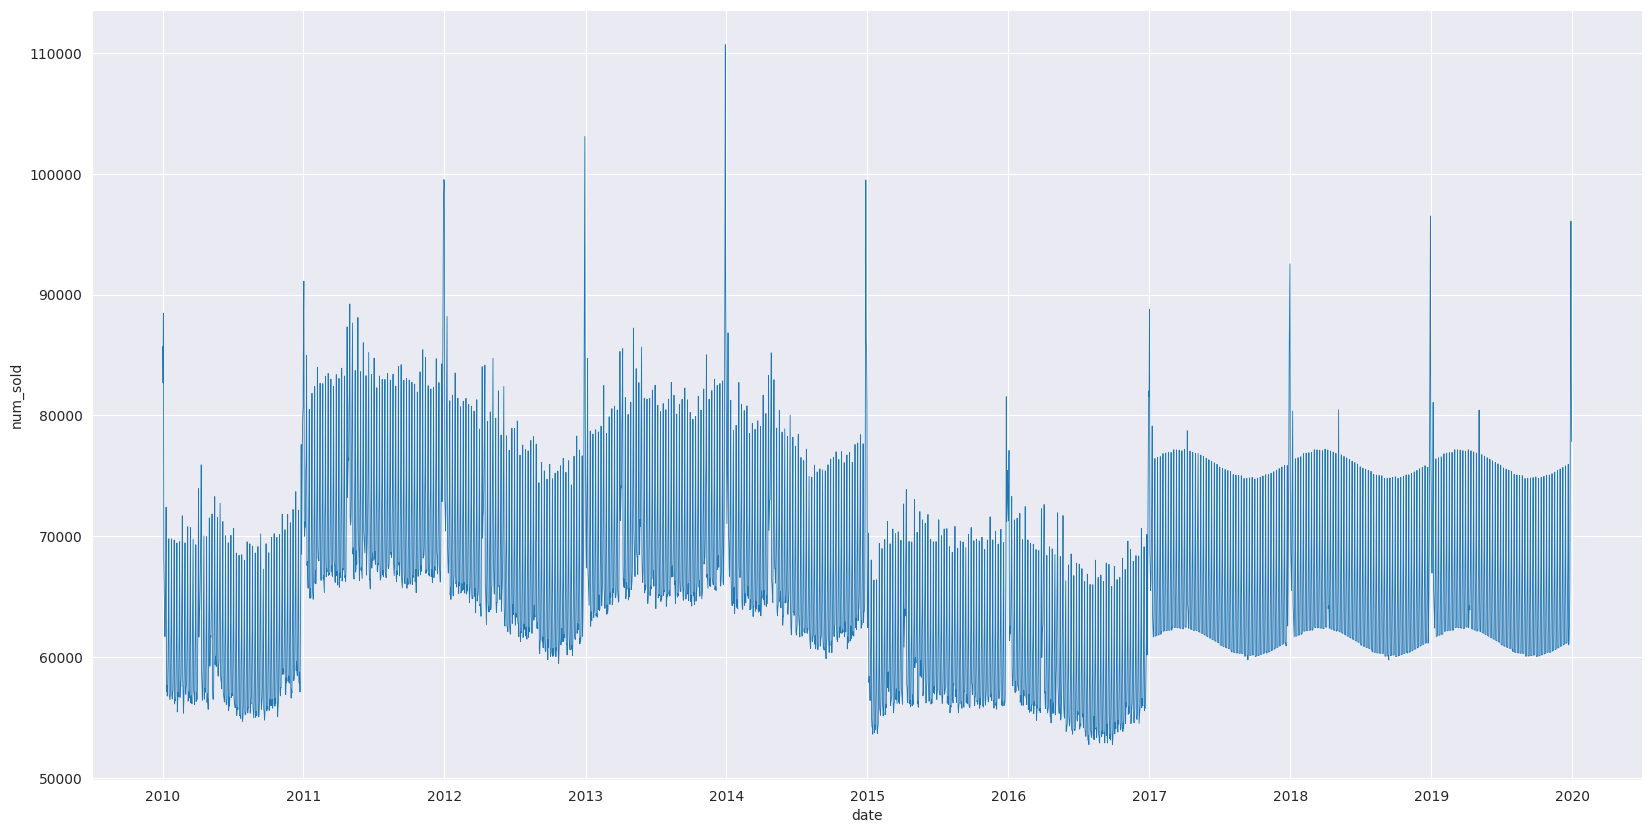

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=pd.concat([train_df_imputed, test_total_sales_dates]).reset_index(drop=True), x="date", y="num_sold", linewidth=0.6)

In [ ]:
product_ratio_2017_df = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2015].copy()
product_ratio_2018_df = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2016].copy()
product_ratio_2019_df = product_ratio_df.loc[product_ratio_df["date"].dt.year == 2015].copy()

product_ratio_2017_df["date"] = product_ratio_2017_df["date"] + pd.DateOffset(years=2)
product_ratio_2018_df["date"] = product_ratio_2018_df["date"] + pd.DateOffset(years=2)
product_ratio_2019_df["date"] = product_ratio_2019_df["date"] + pd.DateOffset(years=4)

forecasted_ratios_df = pd.concat([product_ratio_2017_df, product_ratio_2018_df, product_ratio_2019_df])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

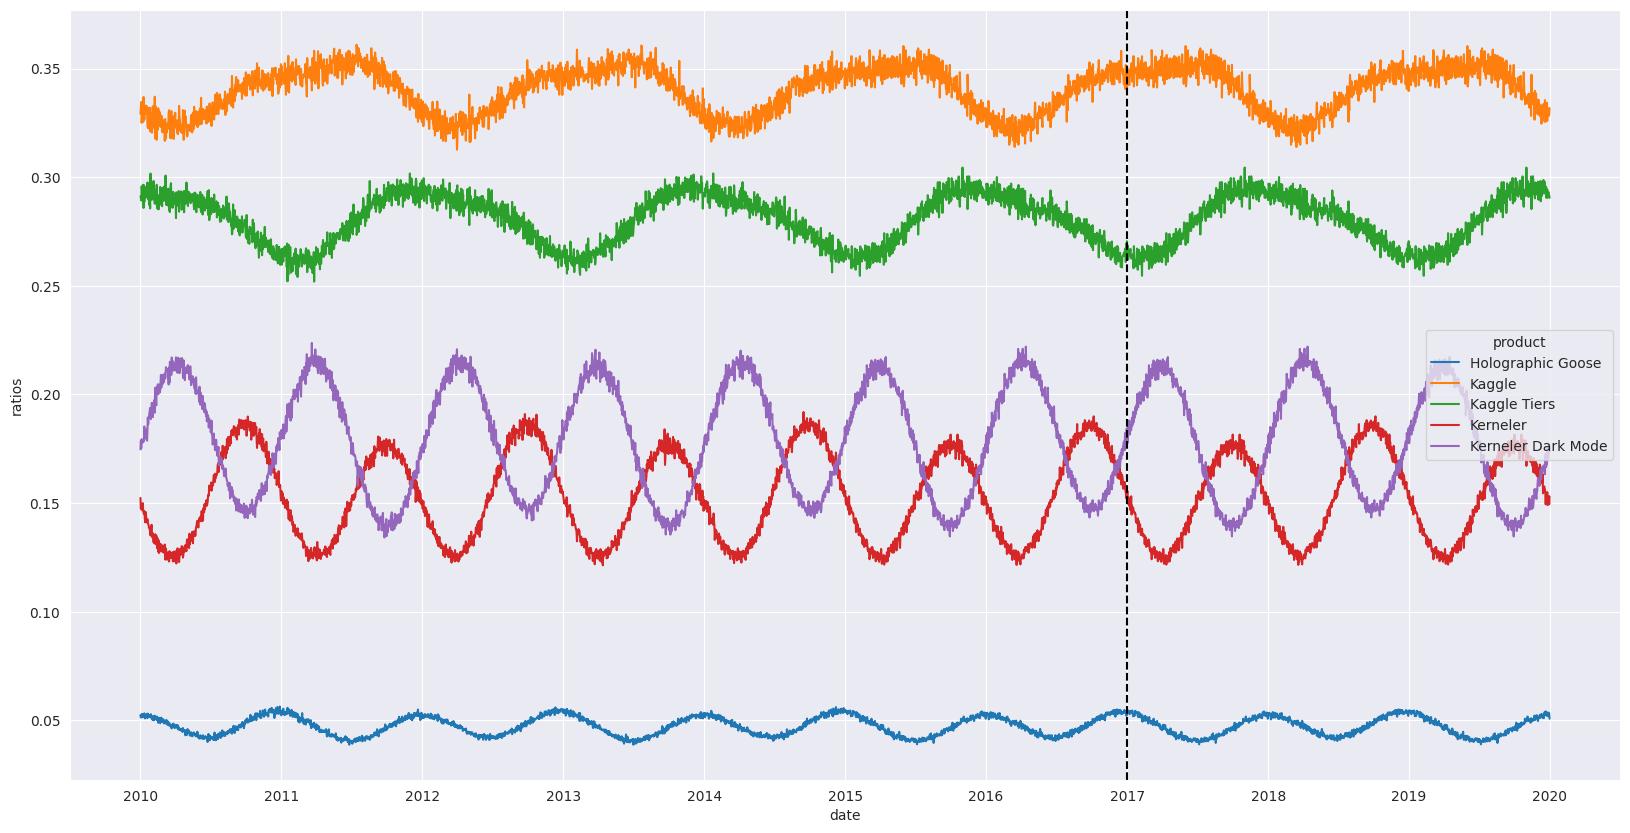

In [ ]:
temp_df = pd.concat([product_ratio_df, forecasted_ratios_df]).reset_index(drop=True)
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=temp_df, x="date", y="ratios", hue="product");
ax.axvline(pd.to_datetime("2017-01-01"), color="black", linestyle="--")

In [ ]:
store_weights_df = store_weights.reset_index()
test_sub_df = pd.merge(test_df, test_total_sales_dates, how="left", on="date")
test_sub_df = test_sub_df.rename(columns= {"num_sold": "day_num_sold"})

test_sub_df = pd.merge(test_sub_df, store_weights_df, how="left", on="store")
test_sub_df = test_sub_df.rename(columns= {"num_sold": "store_ratio"})

test_sub_df["year"] = test_sub_df["date"].dt.year
test_sub_df = pd.merge(test_sub_df, gdp_filtered_ratio_df2, how="left", on=["year", "country"])
test_sub_df = test_sub_df.rename(columns= {"ratio": "country_ratio"})

test_sub_df = pd.merge(test_sub_df, forecasted_ratios_df, how="left", on=["date", "product"])
test_sub_df = test_sub_df.rename(columns= {"ratios": "product_ratio"})

test_sub_df["num_sold"] = test_sub_df["day_num_sold"] * test_sub_df["store_ratio"] * test_sub_df["country_ratio"] * test_sub_df["product_ratio"]


In [ ]:
test_sub_df["num_sold"] = test_sub_df["num_sold"].round()
display(test_sub_df.head(2))

id       date country              store            product  \
0  230130 2017-01-01  Canada  Discount Stickers  Holographic Goose   
1  230131 2017-01-01  Canada  Discount Stickers             Kaggle   

   day_num_sold  store_ratio  year  country_ratio  product_ratio  num_sold  
0  88797.579144      0.18471  2017       0.171772       0.053745     151.0  
1  88797.579144      0.18471  2017       0.171772       0.350047     986.0

In [ ]:
def plot_individual_ts(df):
  colour_map = {"Canada": "blue", "Finland": "orange", "Italy": "green", "Kenya": "red", "Norway": "purple", "Singapore": "brown"}
  for country in df["country"].unique():
    f, axes = plt.subplots(df["store"].nunique()*df["product"].nunique(), figsize=(20, 75))
    count = 0
    for store in df["store"].unique():
      for product in df["product"].unique():
        print(df)
        plot_df = df.loc[(df["product"] == product) & (df["country"] == country) & (df["store"] == store)]
        sns.lineplot(data=plot_df, x="date", y="num_sold", linewidth=0.5, ax=axes[count], color=colour_map[country])
        axes[count].set_title(f"{country} - {store} - {product}")
        axes[count].axvline(pd.to_datetime("2017-01-01"), color="black", linestyle="--");
        count+=1

             date      num_sold        id    country                 store  \
0      2010-01-01  85710.030833       NaN        NaN                   NaN   
1      2010-01-02  82699.204783       NaN        NaN                   NaN   
2      2010-01-03  88475.341887       NaN        NaN                   NaN   
3      2010-01-04  68206.329432       NaN        NaN                   NaN   
4      2010-01-05  65831.631772       NaN        NaN                   NaN   
...           ...           ...       ...        ...                   ...   
101192 2019-12-31    423.000000  328675.0  Singapore  Premium Sticker Mart   
101193 2019-12-31   2761.000000  328676.0  Singapore  Premium Sticker Mart   
101194 2019-12-31   2417.000000  328677.0  Singapore  Premium Sticker Mart   
101195 2019-12-31   1273.000000  328678.0  Singapore  Premium Sticker Mart   
101196 2019-12-31   1446.000000  328679.0  Singapore  Premium Sticker Mart   

                   product  day_num_sold  store_ratio    year  

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


KeyError: nan

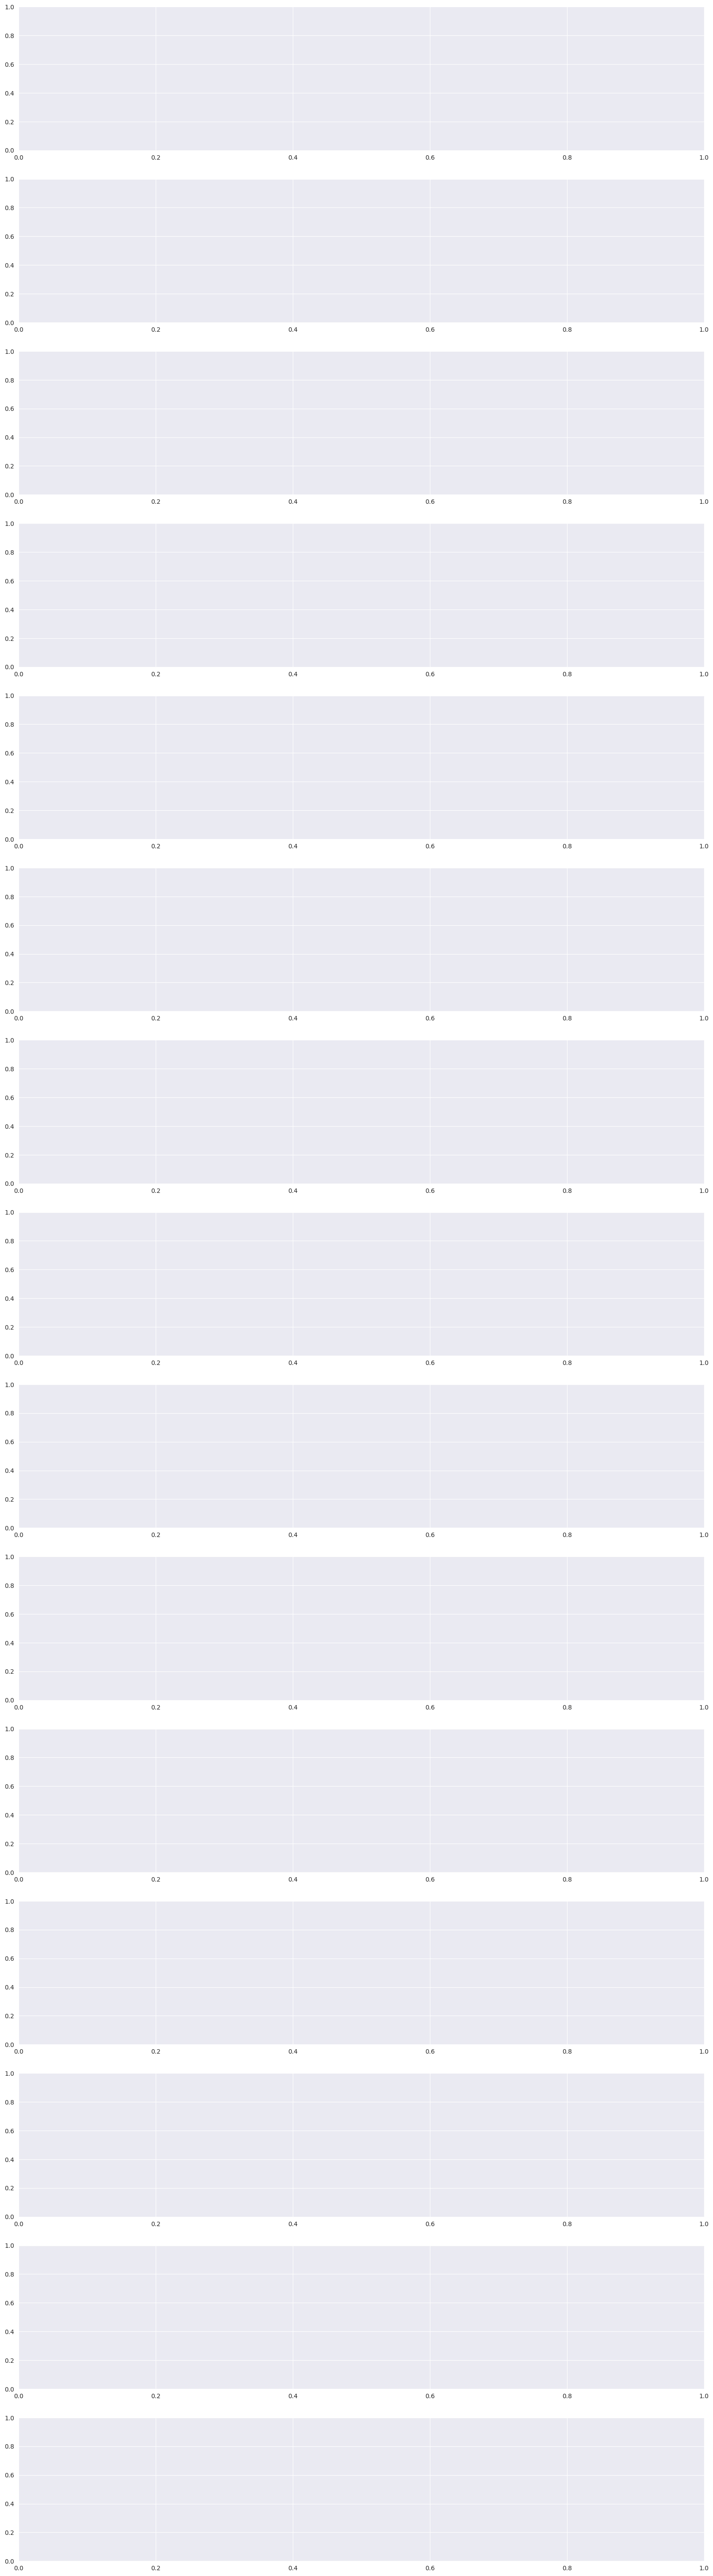

In [ ]:
plot_individual_ts(pd.concat([original_train_df_imputed, test_sub_df]).reset_index(drop=True))

In [ ]:
submission = pd.read_csv("forecasting/dataset/sample_submission.csv")
submission["num_sold"] = test_sub_df["num_sold"]
display(submission.head(2))

In [ ]:
submission.to_csv("submission.csv", index = False)